# *socialmedia* dataset from Kaggle

This is an script for processing and visualizing social media data from:
https://www.kaggle.com/datasets/anoopjohny/socialmedia

This dataset provides a comprehensive and diverse snapshot of social media users and their engagements across various popular platforms such as Instagram, Twitter, Facebook, YouTube, Goodreads, Twitch and Spotify. With 100 rows of data, it offers valuable insights into the dynamic world of social media usage.

INSIGHT: Social Media Engagement and User Behavior Analysis.


I'll try to answer the following questions:

    - What are the most common types of media being shared (e.g., images, videos, text)?
    - Are there any trends in the topics or themes of posts?
    - How do different types of content correlate with user engagement metrics?
    - What are the average engagement rates (likes, comments, shares) for posts?
    - Are there any factors that significantly influence engagement rates (e.g., hashtags, mentions)?


    - Are there any patterns or trends in user interactions with content (e.g., peak engagement times)?
    - How do factors such as post frequency, content type, and user interactions affect user engagement metrics?


    - What are the characteristics of each user segment?
    - What insights can be gained from user segmentation for marketing and engagement strategies?

## Loading libraries

In [100]:
import numpy as np 
# numpy: Python library for mathematical operations and array manipulation. 
# It's especially useful for mathematical operations on multi-dimensional arrays.

import pandas as pd 
# pandas: Python library for data manipulation and analysis. 
# It provides data structures and functions necessary for manipulating structured datasets.

import missingno as msno
# missingno: Python library for visualizing missing data in a pandas DataFrame. 
# It provides a small, flexible, and easy-to-use tool for handling missing data.

import matplotlib.pyplot as plt
# matplotlib.pyplot: Python module for creating static, animated, and interactive visualizations in Python. 
# It's the most used plotting library in the Python community.

import seaborn as sns
# seaborn: Python data visualization library based on matplotlib. 
# It provides a high-level interface for drawing attractive and informative statistical graphics.

import os
# os: Python module that provides functions for interacting with the operating system. 
# It's used to access the operating system's directory structure, read or write to files, etc.

## Loading data

In [101]:
file = r"c:/Users/mar27/OneDrive/Documentos/CURSOS/DATA SCIENCE KSCHOOL/00_PRACTICING/socialmedia/archive/socialmedia.csv" # write the path to the file
df = pd.read_csv(file)

## 1 - General information about the dataset

In [102]:
df.head()

User ID          Username   Platform  Post ID  \
0      101  @adventureSeeker  Instagram    82036   
1      215   @foodieTraveler    Twitter    12463   
2      303  @wellnessJourney   Facebook    45982   
3      404     @fitnessFreak  Instagram    16572   
4      521     @foodExplorer    Twitter    75589   

                                           Post Text    Post Timestamp  \
0  "Experiencing the thrill of a lifetime! #Adven...  30-07-2023 14:45   
1    "Indulging in local delicacies! #FoodieTravels"  30-07-2023 19:30   
2              "Finding peace and balance in nature!  30-07-2023 08:15   
3                     "Pushing my limits in the gym!  30-07-2023 12:30   
4      "Discovering unique flavors around the world!  30-07-2023 16:20   

   Likes/Reactions  Comments  Shares/Retweets          Hashtags  ...  \
0             1500       250              120    #AdventureTime  ...   
1              850        70               50    #FoodieTravels  ...   
2              680        80               40  #WellnessJourney  ...   
3             1850       350              180     #FitnessGoals  ...   
4              950        80               60          #Foodies  ...   

   Account Creation Date Account Verification User Engagement  \
0             10-05-2019             Verified            1870   
1             15-09-2017         Not verified             970   
2             02-03-2020         Not verified             800   
3             12-08-2016             Verified            2380   
4             28-02-2018         Not verified            1090   

  User Interactions     User Activity              User Bio  \
0             15700  3 posts per week  Adventure enthusiast   
1              8300  5 posts per week     Culinary explorer   
2              6200  2 posts per week   Wellness enthusiast   
3             32750  4 posts per week    Fitness enthusiast   
4              9080  3 posts per week   Culinary adventurer   

        User Description 1       User Description 2         Server Post  \
0             Nature lover  Seeker of wanderlust ??     California, USA   
1  Street food connoisseur         Travel addict ??          London, UK   
2         Yogi in training     Mindfulness advocate  San Francisco, USA   
3         Health is wealth           Workout addict    Los Angeles, USA   
4     Gastronomic traveler              Bon app?it!       Paris, France   

  User Language  
0       English  
1       English  
2       English  
3       English  
4       English  

[5 rows x 28 columns]

In [103]:
df.sample(5) # The `sample` method from pandas is used to generate a random sample from your DataFrame.


User ID       Username   Platform  Post ID  \
33      725   @gameChanger     Twitch    12462   
15      825    @filmCritic    YouTube    65241   
25      802  @musicMaestro    Spotify    48720   
11      305   @musicAddict    Spotify    60912   
7       825  @petWhisperer  Instagram    98342   

                             Post Text    Post Timestamp  Likes/Reactions  \
33  "Redefining the gaming experience!  30-07-2023 14:00              880   
15  "Reviewing the latest blockbuster!  30-07-2023 15:20              740   
25  "Harmonizing hearts with melodies!  30-07-2023 13:50              810   
11  "Discovering hidden gems in music!  30-07-2023 09:20              900   
7      "Connecting with furry friends!  30-07-2023 15:55             2200   

    Comments  Shares/Retweets         Hashtags  ...  Account Creation Date  \
33        90               50     #GameChanger  ...             15-12-2020   
15        90               60    #MovieReviews  ...             05-01-2019   
25        90               50      #MusicMagic  ...             29-06-2019   
11       110               70  #MusicDiscovery  ...             28-04-2021   
7        320              200         #PetLove  ...             29-03-2022   

   Account Verification User Engagement User Interactions     User Activity  \
33         Not verified            1020              6720  4 posts per week   
15         Not verified             890             10900   1 post per week   
25         Not verified             950              8740  3 posts per week   
11         Not verified            1080              8880    1 post per day   
7              Verified            2720             21600  2 posts per week   

            User Bio  User Description 1  User Description 2  \
33  Gaming visionary         VR explorer    Next-level gamer   
15   Film enthusiast        Cinema lover      Popcorn addict   
25  Music aficionado      Melody maestro   Soulful serenader   
11     Melody seeker     Rhythm explorer     Harmonious soul   
7       Animal lover       Cat whisperer        Pet advocate   

           Server Post User Language  
33  San Francisco, USA       English  
15    Los Angeles, USA       English  
25          London, UK       English  
11    Los Angeles, USA       English  
7   New York City, USA       English  

[5 rows x 28 columns]

This is useful when you want to quickly inspect your data without having to look at the entire DataFrame. 
It can also be used to create a test or validation dataset from a larger dataset.

In [104]:
columns = df.columns
columns

Index(['User ID', 'Username', 'Platform', 'Post ID', 'Post Text',
       'Post Timestamp', 'Likes/Reactions', 'Comments', 'Shares/Retweets',
       'Hashtags', 'Mentions', 'Media Type', 'Media URL', 'Post URL',
       'Location', 'Privacy Settings', 'User Followers', 'User Following',
       'Account Creation Date', 'Account Verification', 'User Engagement',
       'User Interactions', 'User Activity', 'User Bio', 'User Description 1',
       'User Description 2', 'Server Post', 'User Language'],
      dtype='object')

In [105]:
df.shape

(39, 28)

In [106]:
df.dtypes

User ID                    int64
Username                  object
Platform                  object
Post ID                    int64
Post Text                 object
Post Timestamp            object
Likes/Reactions            int64
Comments                   int64
Shares/Retweets            int64
Hashtags                  object
Mentions                 float64
Media Type                object
Media URL                 object
Post URL                  object
Location                  object
Privacy Settings          object
User Followers             int64
User Following             int64
Account Creation Date     object
Account Verification      object
User Engagement            int64
User Interactions          int64
User Activity             object
User Bio                  object
User Description 1        object
User Description 2        object
Server Post               object
User Language             object
dtype: object

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User ID                39 non-null     int64  
 1   Username               39 non-null     object 
 2   Platform               39 non-null     object 
 3   Post ID                39 non-null     int64  
 4   Post Text              39 non-null     object 
 5   Post Timestamp         39 non-null     object 
 6   Likes/Reactions        39 non-null     int64  
 7   Comments               39 non-null     int64  
 8   Shares/Retweets        39 non-null     int64  
 9   Hashtags               39 non-null     object 
 10  Mentions               0 non-null      float64
 11  Media Type             39 non-null     object 
 12  Media URL              25 non-null     object 
 13  Post URL               39 non-null     object 
 14  Location               39 non-null     object 
 15  Privacy 

In [108]:
df.nlargest(10,'Likes/Reactions') # This is useful to see the highest values of a specific variable

User ID          Username   Platform  Post ID  \
7       825     @petWhisperer  Instagram    98342   
3       404     @fitnessFreak  Instagram    16572   
16      943      @fashionIcon  Instagram    30420   
0       101  @adventureSeeker  Instagram    82036   
20      303      @fitnessGuru   Facebook    92634   
32      618      @petAdvocate  Instagram    94728   
12      427       @petRescuer  Instagram    14236   
13      598      @natureLover  Instagram    95641   
5       609   @wanderlustSoul   Facebook    24680   
28      210     @globeTrotter   Facebook    67482   

                                            Post Text    Post Timestamp  \
7                     "Connecting with furry friends!  30-07-2023 15:55   
3                      "Pushing my limits in the gym!  30-07-2023 12:30   
16                        "Setting trends with style!  30-07-2023 11:40   
0   "Experiencing the thrill of a lifetime! #Adven...  30-07-2023 14:45   
20                 "Empowering lives through fitness!  30-07-2023 12:40   
32                  "Giving a voice to the voiceless!  30-07-2023 09:55   
12             "Giving furry friends a second chance!  30-07-2023 11:50   
13         "Finding serenity in the beauty of nature!  30-07-2023 18:50   
5                    "Embracing the beauty of nature!  30-07-2023 09:45   
28  "Discovering the world's wonders! ?? #Wanderlust"  30-07-2023 15:40   

    Likes/Reactions  Comments  Shares/Retweets            Hashtags  ...  \
7              2200       320              200            #PetLove  ...   
3              1850       350              180       #FitnessGoals  ...   
16             1750       320              220        #Fashionista  ...   
0              1500       250              120      #AdventureTime  ...   
20             1500       250              120  #FitnessMotivation  ...   
32             1450       250              120       #AnimalRights  ...   
12             1350       280              150      #AdoptDontShop  ...   
13             1220       180              100         #NatureLove  ...   
5              1200       110               50         #Wanderlust  ...   
28             1150       140               70         #Wanderlust  ...   

    Account Creation Date Account Verification User Engagement  \
7              29-03-2022             Verified            2720   
3              12-08-2016             Verified            2380   
16             10-07-2016             Verified            2290   
0              10-05-2019             Verified            1870   
20             22-08-2017         Not verified            1870   
32             10-11-2018         Not verified            1820   
12             19-11-2016             Verified            1780   
13             15-06-2018         Not verified            1500   
5              05-09-2019         Not verified            1360   
28             08-05-2019             Verified            1360   

   User Interactions     User Activity              User Bio  \
7              21600  2 posts per week          Animal lover   
3              32750  4 posts per week    Fitness enthusiast   
16             28400  4 posts per week    Fashion enthusiast   
0              15700  3 posts per week  Adventure enthusiast   
20             16200  4 posts per week          Fitness guru   
32              8400    1 post per day       Animal advocate   
12             12900  3 posts per week       Animal advocate   
13              9100  2 posts per week        Nature admirer   
5              10850  2 posts per week  Traveler at heart ??   
28             13900  3 posts per week            Adventurer   

    User Description 1        User Description 2         Server Post  \
7        Cat whisperer              Pet advocate  New York City, USA   
3     Health is wealth            Workout addict    Los Angeles, USA   
16    Style influencer               Trendsetter  New York City, USA   
0         Nature lover   Seeker of wanderlust ??

In [109]:
df.describe().T

count          mean           std      min      25%  \
User ID             39.0    480.538462    276.570525    101.0    215.0   
Post ID             39.0  54980.717949  28586.874193  12462.0  27616.5   
Likes/Reactions     39.0    967.179487    402.870939    370.0    700.0   
Comments            39.0    133.333333     82.695807     40.0     80.0   
Shares/Retweets     39.0     76.923077     45.719617     30.0     50.0   
Mentions             0.0           NaN           NaN      NaN      NaN   
User Followers      39.0  10458.974359   6224.980150   3200.0   6450.0   
User Following      39.0    489.743590    289.777475    200.0    300.0   
User Engagement     39.0   1177.435897    520.888502    450.0    840.0   
User Interactions   39.0  11302.307692   6294.957657   4600.0   7055.0   

                       50%      75%      max  
User ID              427.0    712.0    943.0  
Post ID            59243.0  81140.5  98342.0  
Likes/Reactions      890.0   1135.0   2200.0  
Comments             110.0    165.0    350.0  
Shares/Retweets       60.0     90.0    220.0  
Mentions               NaN      NaN      NaN  
User Followers      8200.0  12750.0  32000.0  
User Following       400.0    600.0   1800.0  
User Engagement     1050.0   1360.0   2720.0  
User Interactions   9080.0  13550.0  32750.0

In [110]:
df['Account Verification'].value_counts()

Account Verification
Not verified    27
Verified        12
Name: count, dtype: int64

In [111]:
df.isna().sum() # The `isna` method from pandas is used to check for missing values in a DataFrame.

User ID                   0
Username                  0
Platform                  0
Post ID                   0
Post Text                 0
Post Timestamp            0
Likes/Reactions           0
Comments                  0
Shares/Retweets           0
Hashtags                  0
Mentions                 39
Media Type                0
Media URL                14
Post URL                  0
Location                  0
Privacy Settings          0
User Followers            0
User Following            0
Account Creation Date     0
Account Verification      0
User Engagement           0
User Interactions         0
User Activity             0
User Bio                  0
User Description 1        0
User Description 2        0
Server Post               0
User Language             0
dtype: int64

### Raw data visualization

First of all, we're going to see is there are missing values.

Text(0.5, 1.0, 'Missing values distribution')

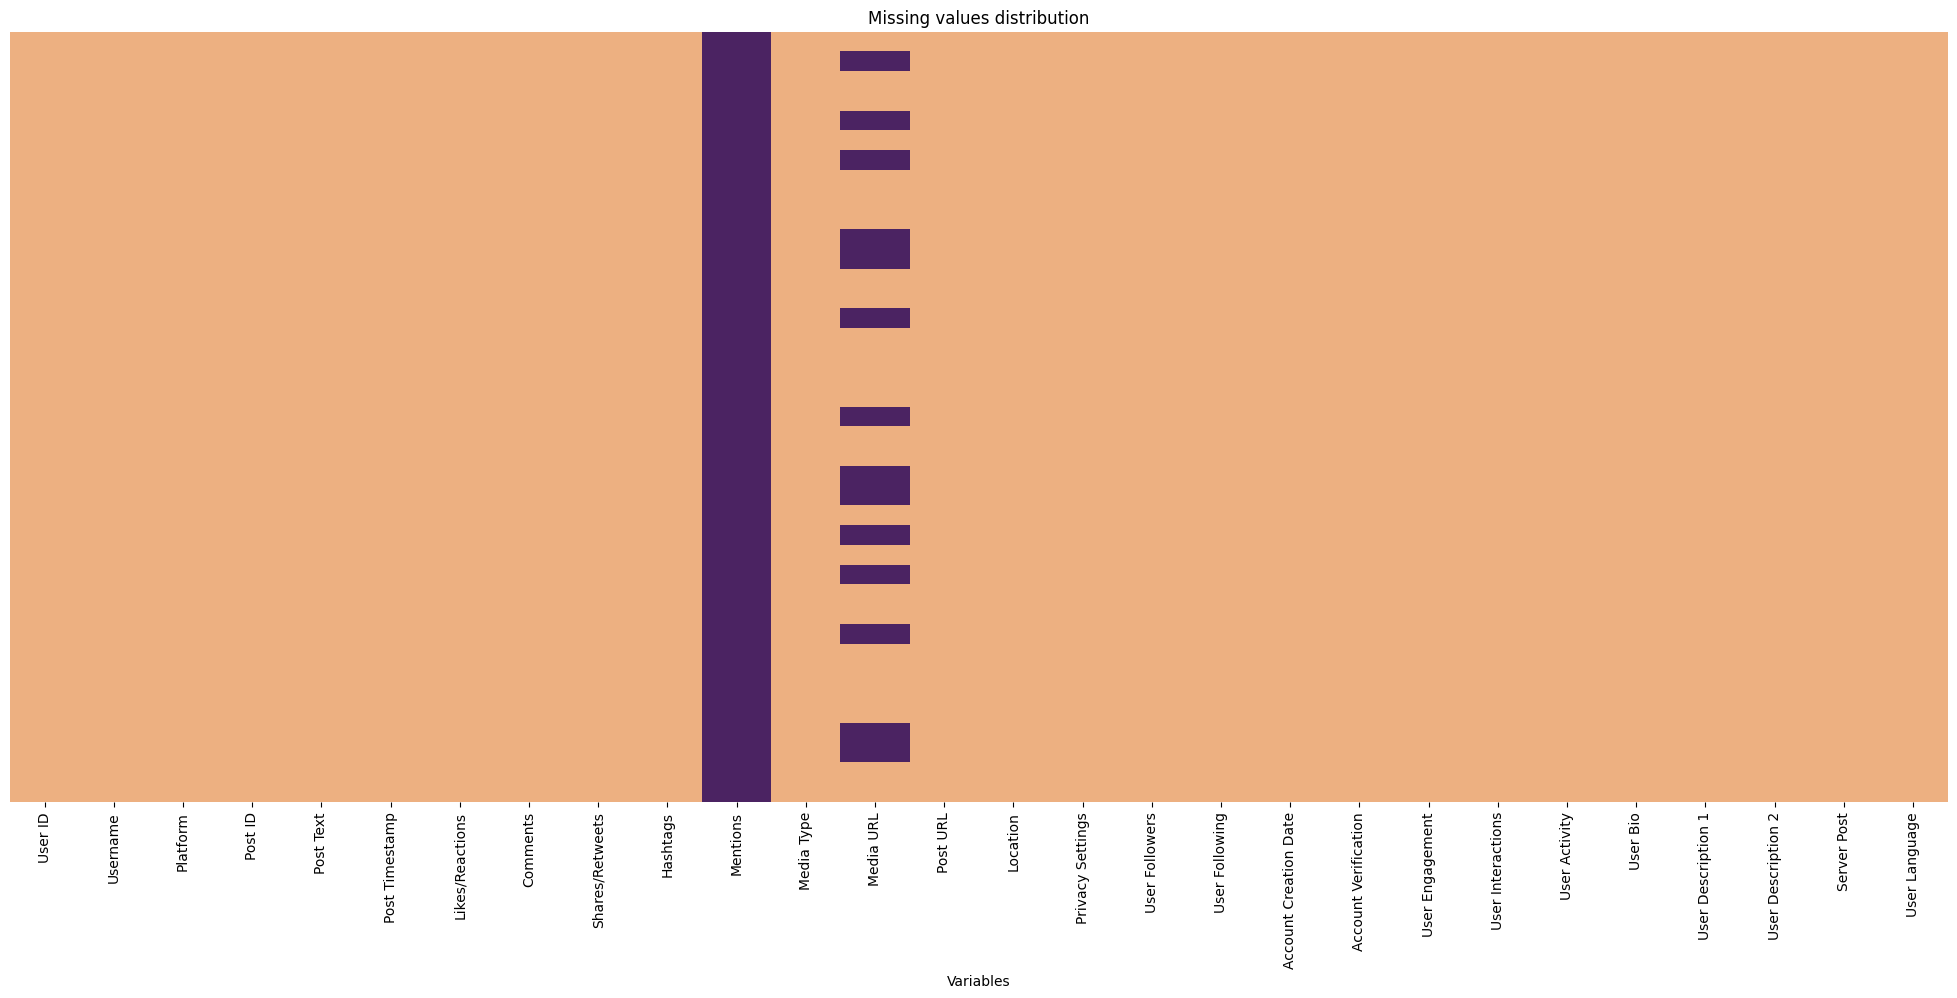

In [112]:
plt.figure(figsize=(25, 10))
sns.heatmap(df.isna(), cbar=False, yticklabels=False,cmap='flare')
plt.xlabel("Variables")
plt.title("Missing values distribution")

Now, let's visualize the distribution of the numerical variables.

Distribution of the numerical variables


c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

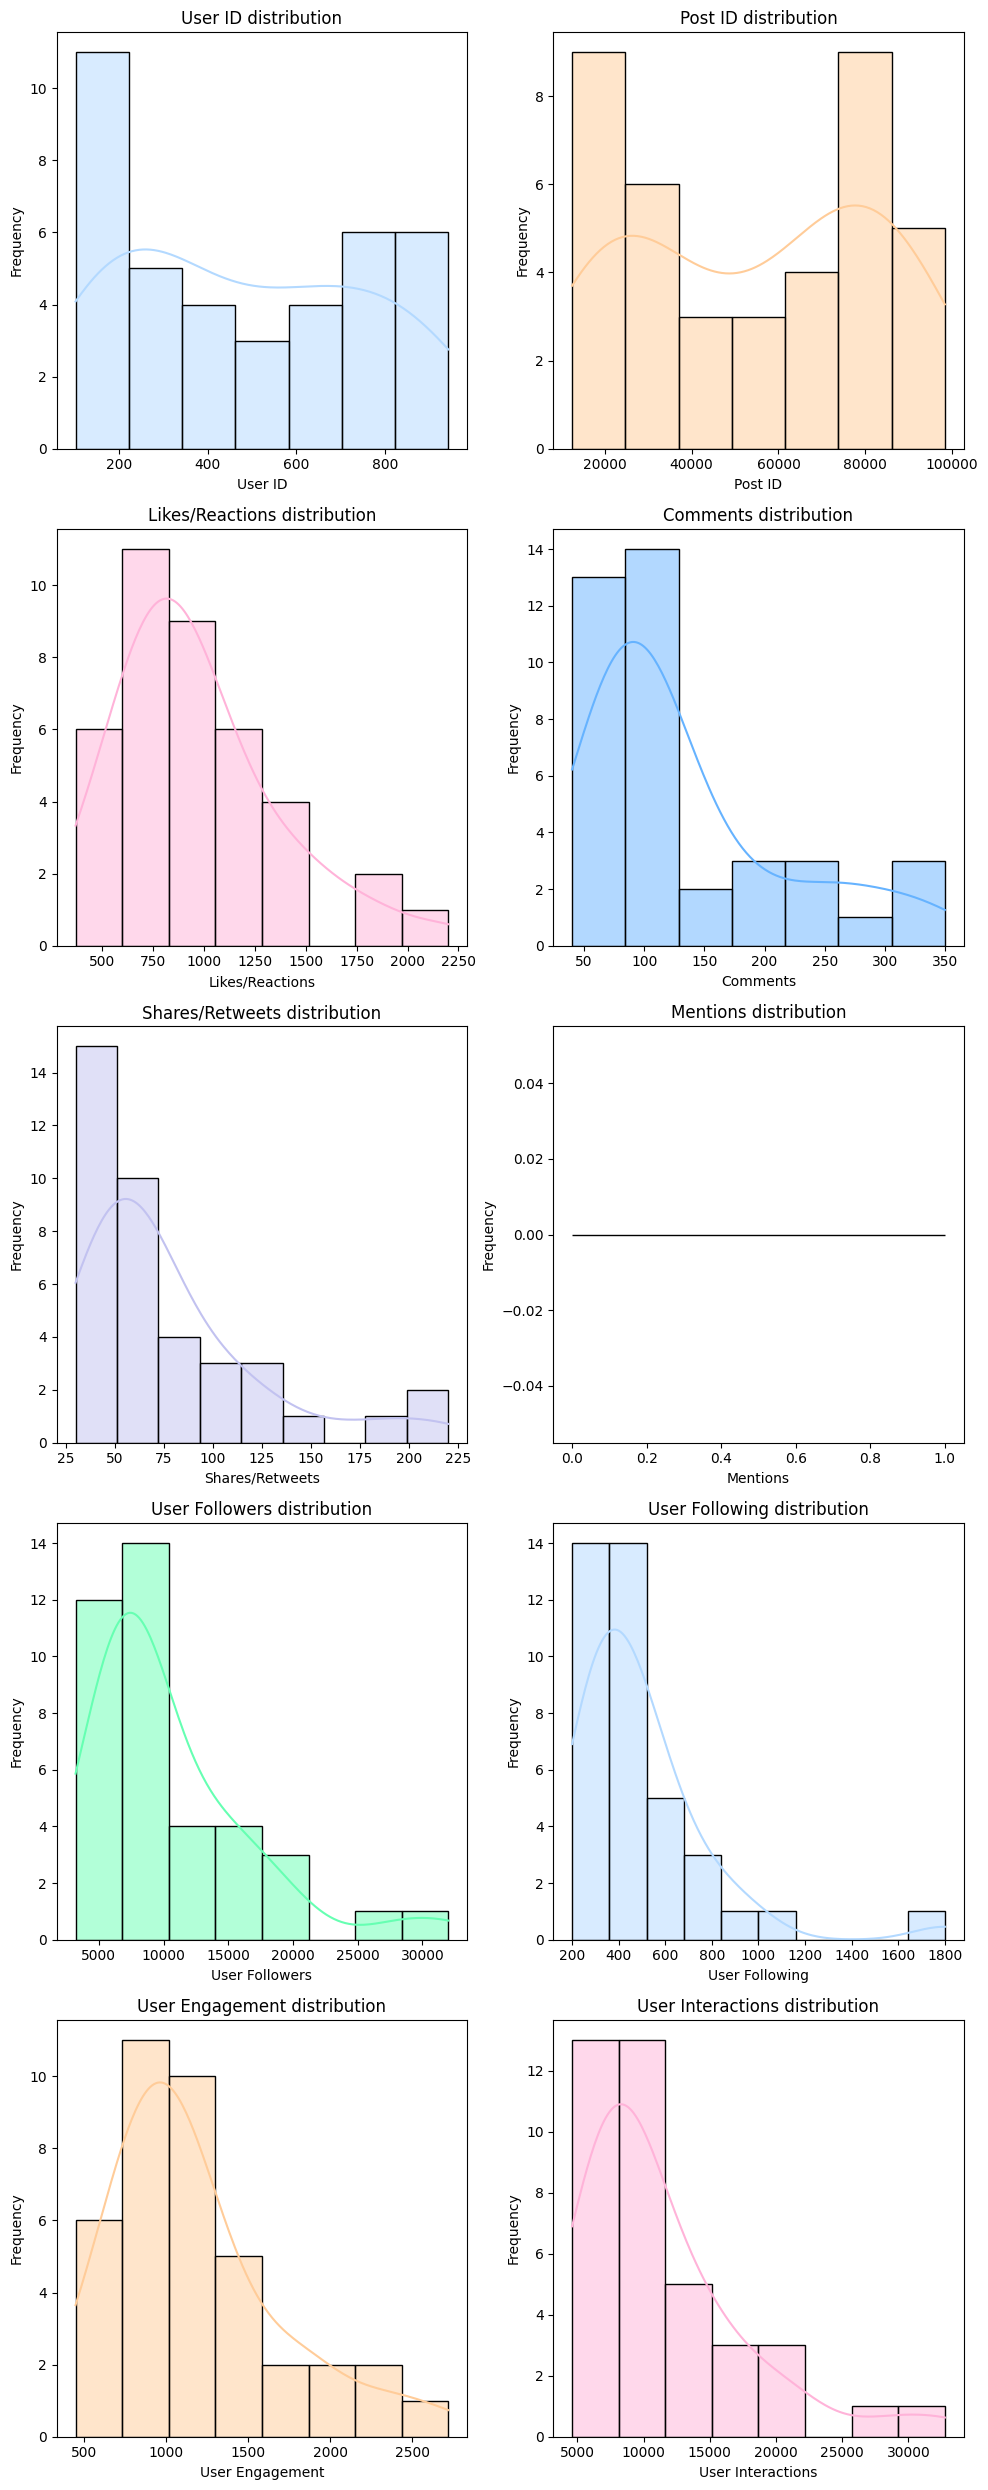

In [113]:
# Define a color palette
colors = ['#B3D9FF', '#ffcc99', '#FFB3D9', '#66b3ff', '#c2c2f0','#6666ff', '#66FFB2']

# Visualization of the distribution of the numerical variables
print("Distribution of the numerical variables")
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Calculate the number of rows needed for the grid
num_rows = len(num_cols) // 2
if len(num_cols) % 2: num_rows += 1

# Create the grid
plt.figure(figsize=(10, 5 * num_rows))
for i, col in enumerate(num_cols):
    plt.subplot(num_rows, 2, i+1)
    sns.histplot(df[col], kde=True, color=colors[i % len(colors)])
    plt.title(f"{col} distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Distribución de las variables categóricas:


c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mar27\AppData\Local\Temp\ipykernel_21532\143811729.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate the x-axis labels
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mar27\AppData\Local\Temp\ipykernel_21532\143811729.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.

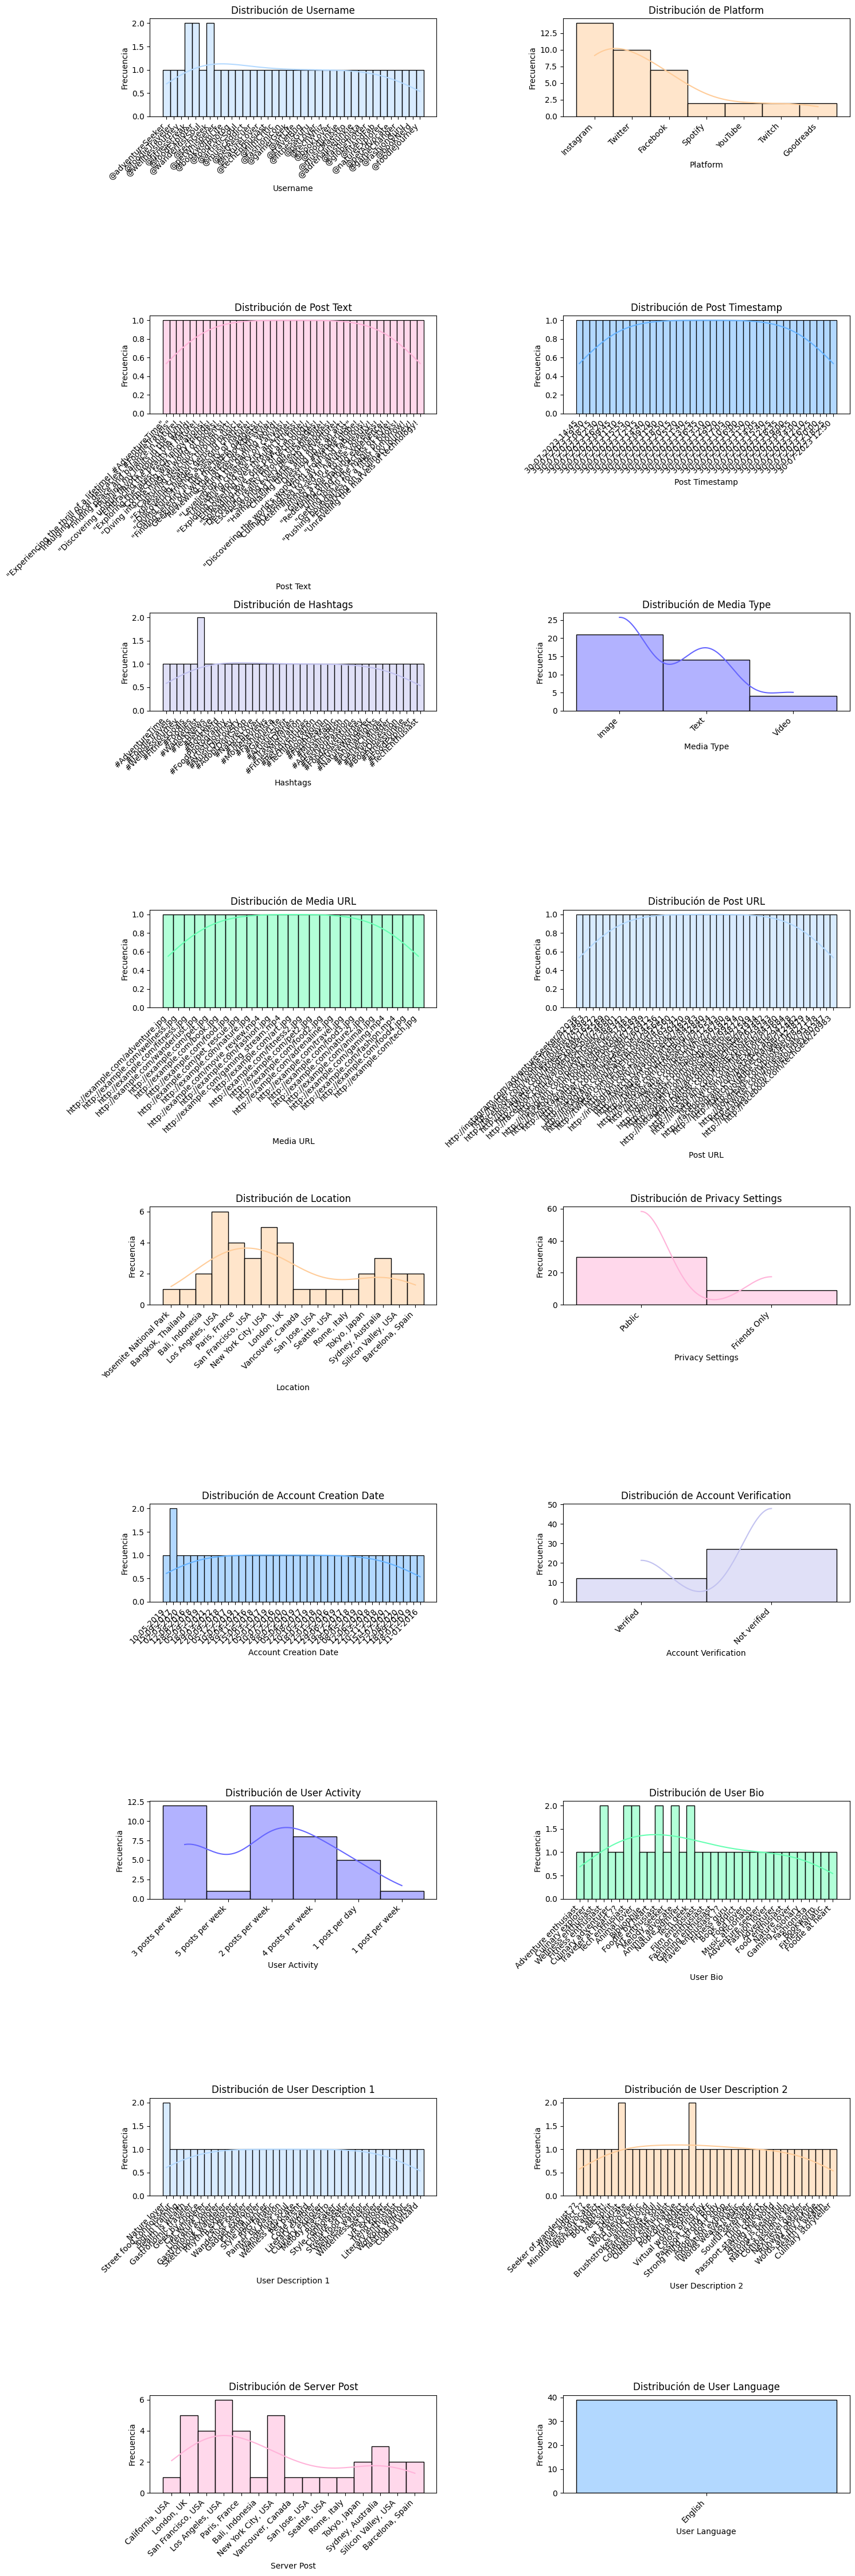

In [114]:
# Define a color palette
colors = ['#B3D9FF', '#ffcc99', '#FFB3D9', '#66b3ff', '#c2c2f0','#6666ff', '#66FFB2']

# Visualization of the distribution of the categorical variables
num_cols = df.select_dtypes(include='object').columns.tolist()

if len(num_cols) > 1:
    print("Distribución de las variables categóricas:")

    # Calculate the number of rows needed for the grid
    num_rows = len(num_cols) // 2
    if len(num_cols) % 2: num_rows += 1

    # Create the grid
    plt.figure(figsize=(15, 5 * num_rows))  # Adjust the width of the figure
    for i, col in enumerate(num_cols):
        plt.subplot(num_rows, 2, i+1)
        plot = sns.histplot(df[col], kde=True, color=colors[i % len(colors)])
        plt.title(f"Distribución de {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate the x-axis labels

    plt.tight_layout()
    plt.show()
else :
    print("[ERROR] No hay suficientes variables categóricas para visualizar la distribución de los datos de las variables categóricas")

Distribución de las variables categóricas:


c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

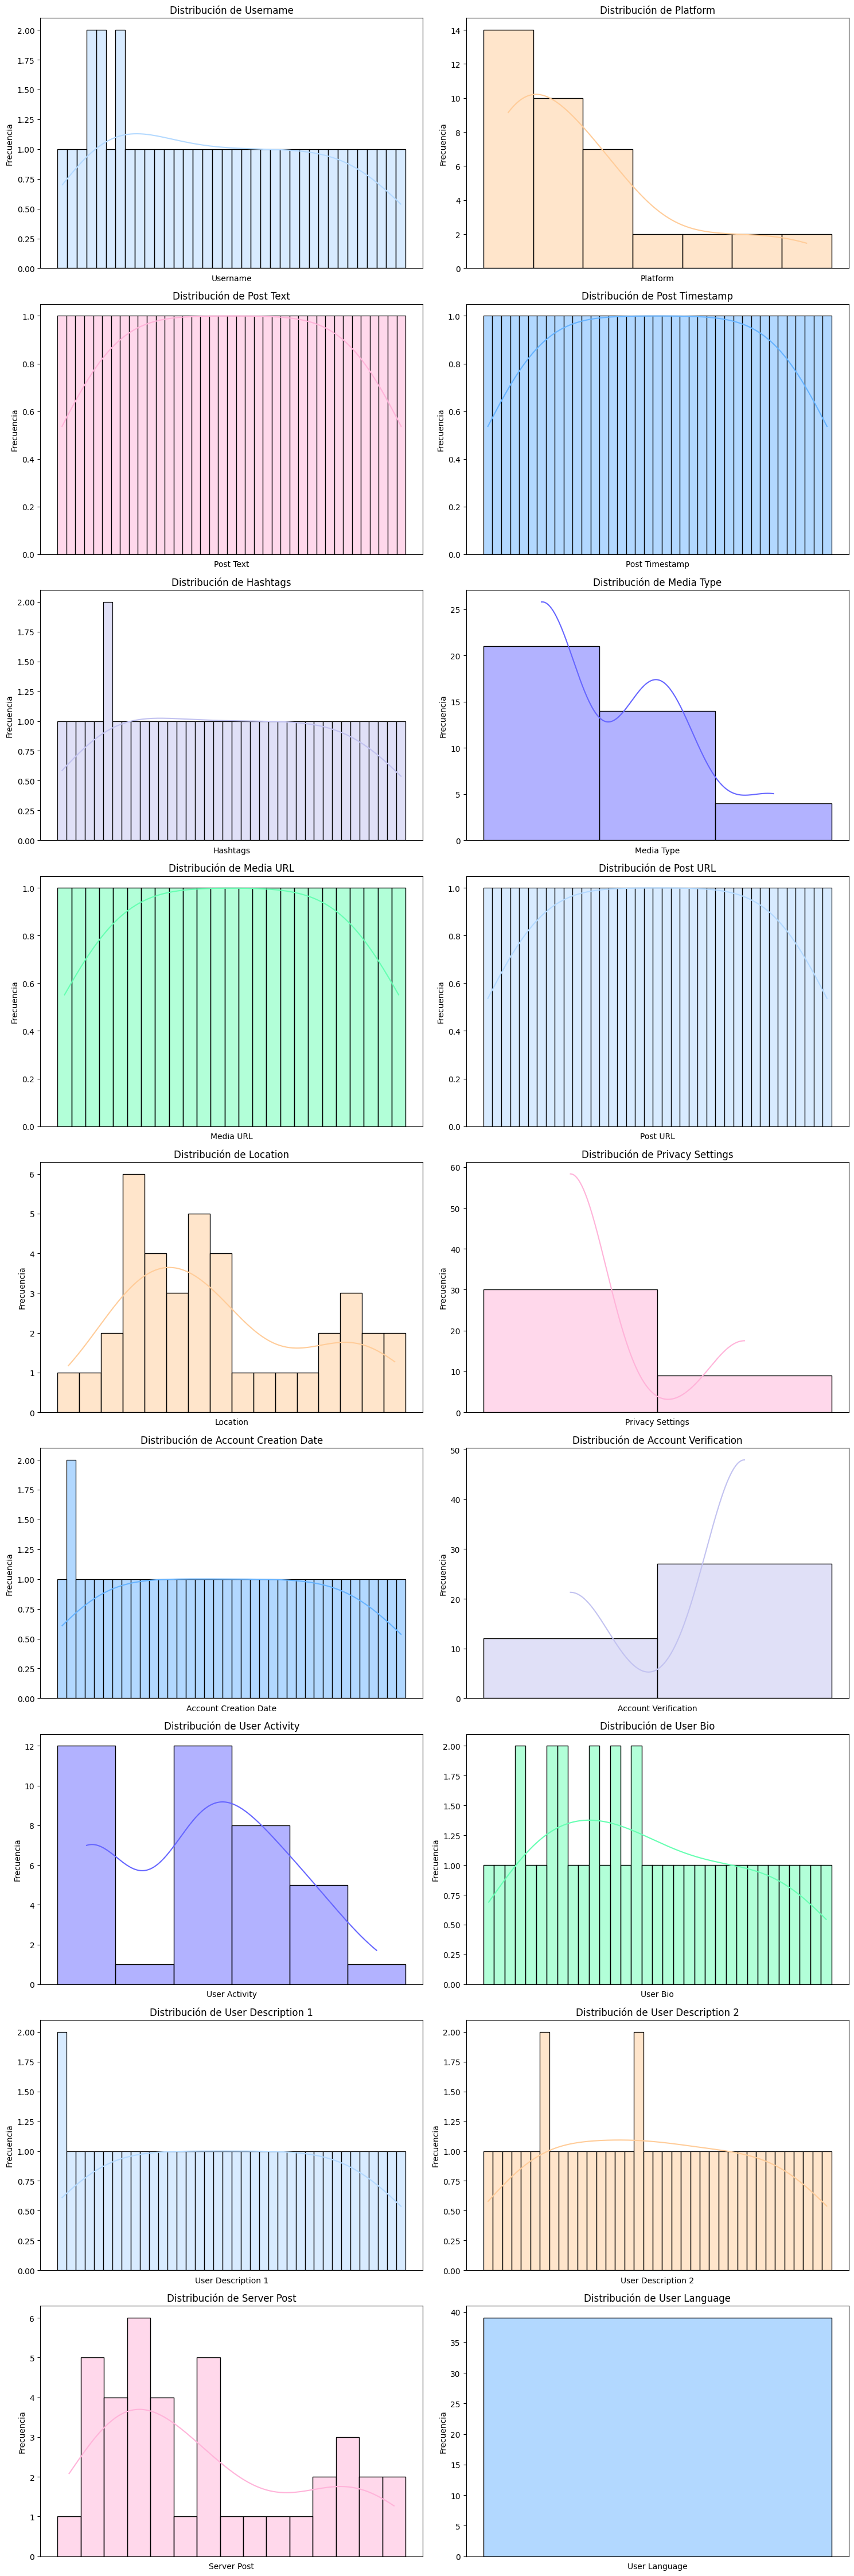

In [115]:
# Define a color palette
colors = ['#B3D9FF', '#ffcc99', '#FFB3D9', '#66b3ff', '#c2c2f0','#6666ff', '#66FFB2']

# Visualization of the distribution of the categorical variables
num_cols = df.select_dtypes(include='object').columns.tolist()

if len(num_cols) > 1:
    print("Distribución de las variables categóricas:")

    # Calculate the number of rows needed for the grid
    num_rows = len(num_cols) // 2
    if len(num_cols) % 2: num_rows += 1

    # Create the grid
    plt.figure(figsize=(15, 5 * num_rows))  # Adjust the width of the figure
    for i, col in enumerate(num_cols):
        plt.subplot(num_rows, 2, i+1)
        sns.histplot(df[col], kde=True, color=colors[i % len(colors)])
        plt.title(f"Distribución de {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.xticks([])  # Remove the x-axis labels

    plt.tight_layout()
    plt.show()
else :
    print("[ERROR] No hay suficientes variables categóricas para visualizar la distribución de los datos de las variables categóricas")

## 2 - Deep data analysis

Non-informative columns should be removed

In [116]:
df['Mentions']

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
30   NaN
31   NaN
32   NaN
33   NaN
34   NaN
35   NaN
36   NaN
37   NaN
38   NaN
Name: Mentions, dtype: float64

There is no data for this variable so we can remove this column

In [117]:
# Removing a column

df.drop('Mentions', axis=1, inplace=True) # The `drop` method from pandas is used to delete a column from a DataFrame.

In [118]:
columns = df.columns
columns

Index(['User ID', 'Username', 'Platform', 'Post ID', 'Post Text',
       'Post Timestamp', 'Likes/Reactions', 'Comments', 'Shares/Retweets',
       'Hashtags', 'Media Type', 'Media URL', 'Post URL', 'Location',
       'Privacy Settings', 'User Followers', 'User Following',
       'Account Creation Date', 'Account Verification', 'User Engagement',
       'User Interactions', 'User Activity', 'User Bio', 'User Description 1',
       'User Description 2', 'Server Post', 'User Language'],
      dtype='object')

**Handle missing values:**

Missing values in a dataset can cause problems with some machine learning algorithms and statistical methods, leading to biased results or errors. Therefore, it's important to handle them appropriately.

For categorical variables, missing values can be treated in several ways:

    Imputation with Mode: The mode of the variable is used to fill the missing values. This is the most common method of treating missing values for categorical variables.

    Creating a New Category: Missing values can be treated as a separate category by itself. This is useful when the data is missing not at random and the missingness itself can be informative.

For numerical variables, missing values can be treated in the following ways:

    Mean/Median/Mode Imputation: The mean, median, or mode of the variable is used to fill the missing values. Mean imputation is suitable when the data is normally distributed, while median imputation is suitable when the data is skewed.

    Predictive Imputation: A predictive model like linear regression, KNN, etc., can be used to predict and impute missing values.

    Using Algorithms that Support Missing Values: Some algorithms like XGBoost and LightGBM can handle missing values without any preprocessing.

Remember, the method for treating missing values depends on the nature of the data and the specific use case. It's always a good idea to try multiple methods and choose the one that results in the best model performance.

In [119]:
df['Media URL']

0         http://example.com/adventure.jpg
1                                      NaN
2          http://example.com/wellness.jpg
3           http://example.com/fitness.jpg
4                                      NaN
5        http://example.com/wanderlust.jpg
6                                      NaN
7               http://example.com/pet.jpg
8              http://example.com/book.jpg
9              http://example.com/food.jpg
10                                     NaN
11                                     NaN
12       http://example.com/pet_rescue.jpg
13           http://example.com/nature.jpg
14                                     NaN
15     http://example.com/movie_review.mp4
16          http://example.com/fashion.jpg
17    http://example.com/gaming_stream.mp4
18              http://example.com/art.jpg
19                                     NaN
20         http://example.com/fitness2.jpg
21             http://example.com/pet2.jpg
22                                     NaN
23         

In [120]:
# to treat missing values from categorical variables
df['Media URL'].fillna('No Media', inplace=True) # The `fillna` method from pandas is used to fill missing values in a DataFrame.
df['Media URL']

0         http://example.com/adventure.jpg
1                                 No Media
2          http://example.com/wellness.jpg
3           http://example.com/fitness.jpg
4                                 No Media
5        http://example.com/wanderlust.jpg
6                                 No Media
7               http://example.com/pet.jpg
8              http://example.com/book.jpg
9              http://example.com/food.jpg
10                                No Media
11                                No Media
12       http://example.com/pet_rescue.jpg
13           http://example.com/nature.jpg
14                                No Media
15     http://example.com/movie_review.mp4
16          http://example.com/fashion.jpg
17    http://example.com/gaming_stream.mp4
18              http://example.com/art.jpg
19                                No Media
20         http://example.com/fitness2.jpg
21             http://example.com/pet2.jpg
22                                No Media
23         

Text(0.5, 1.0, 'Missing values distribution')

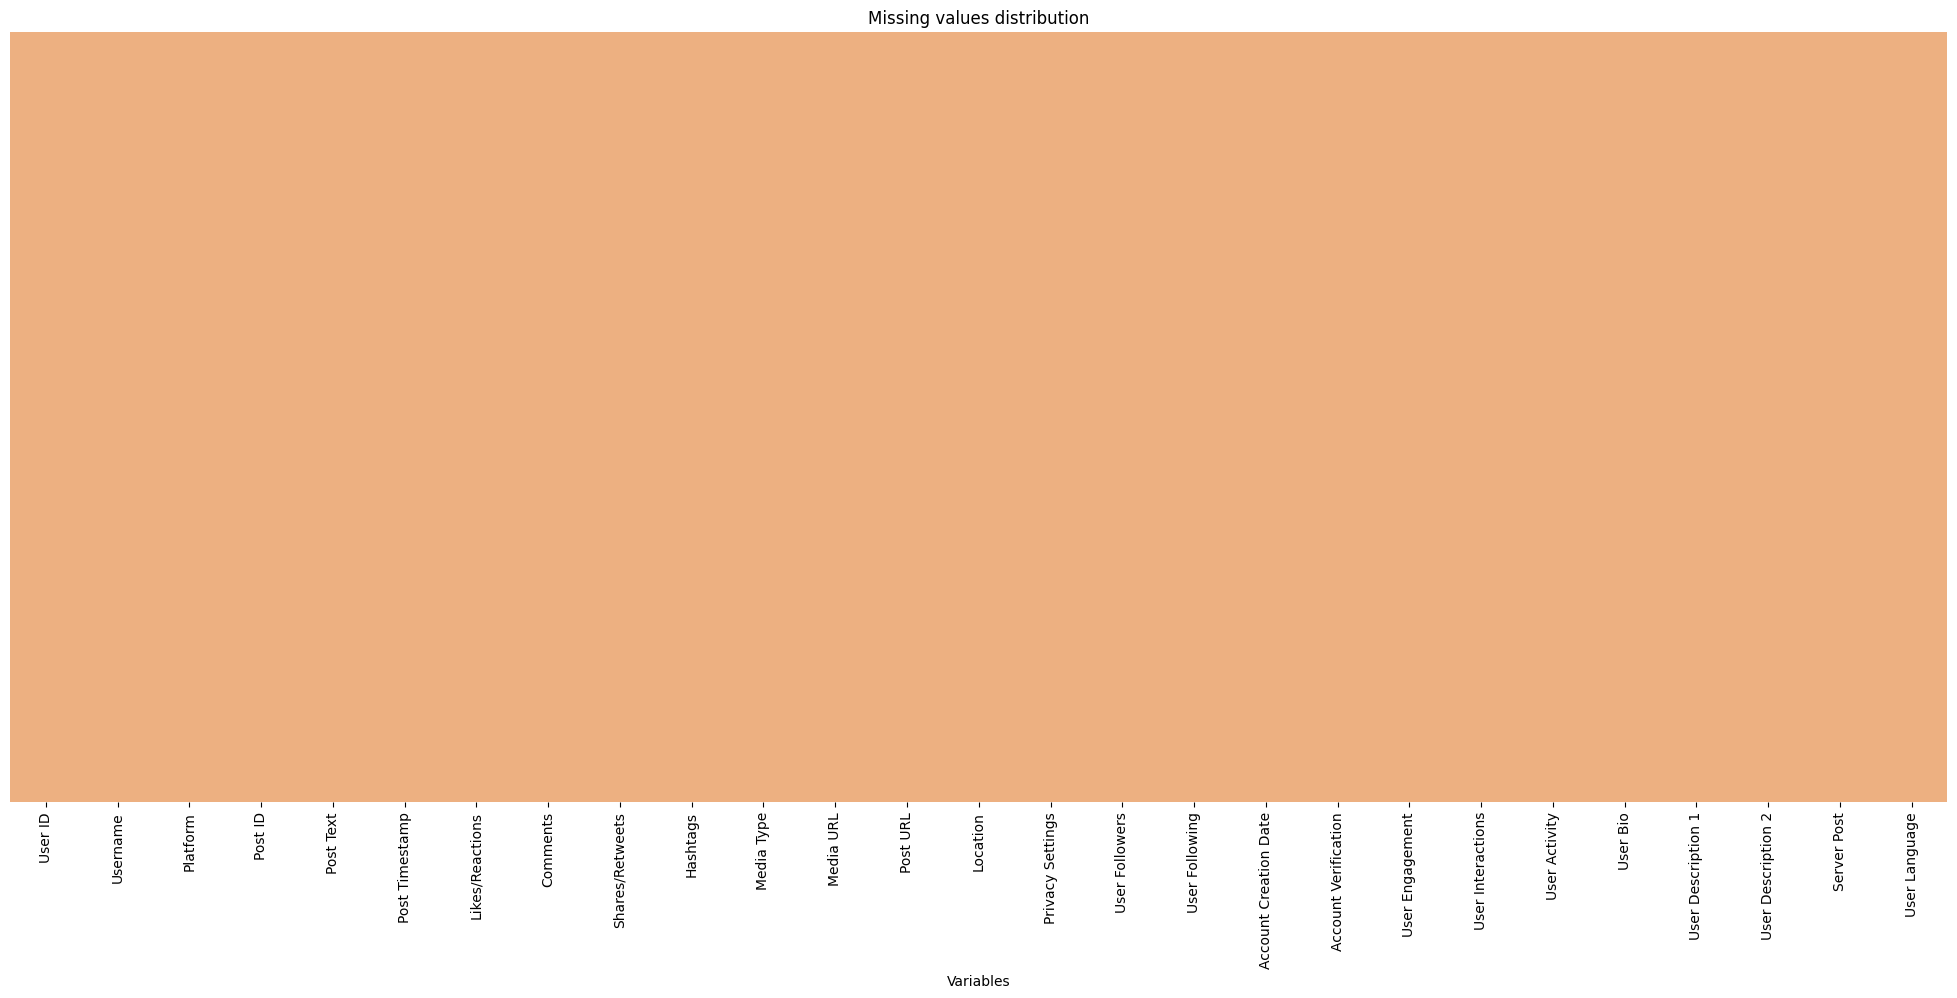

In [121]:
plt.figure(figsize=(25, 10))
sns.heatmap(df.isna(), cbar=False, yticklabels=False,cmap='flare')
plt.xlabel("Variables")
plt.title("Missing values distribution")

**Checking for duplicates** in the indices of a DataFrame in Python can be useful for several reasons:

- Data integrity: Unique indices are important for ensuring data integrity. Duplicates in indices could indicate issues in data collection or manipulation, potentially leading to incorrect or biased analysis results.

- Operation efficiency: Some operations in Pandas DataFrames can be more efficient when indices are unique. For example, indexing and value searching are faster when working with unique indices.

- Joining and merging: When joining or merging DataFrames in Pandas, unique indices can simplify the process and avoid ambiguities in the results.

- Identifying data issues: The presence of duplicate indices could be an indicator of data duplication problems in the underlying dataset. This can be especially important in data cleaning and preparation before analysis or modeling.

In [122]:
df.index.is_unique # The `is_unique` attribute from pandas is used to check if the index of a DataFrame is unique.

True

In [123]:
df['User ID'].is_unique

False

In [124]:
df['User ID'].duplicated().sum() # The `duplicated` method from pandas is used to check for duplicate values in a DataFrame.

6

In [125]:
df[df['User ID'].duplicated()]

User ID         Username   Platform  Post ID  \
14      712  @techEnthusiast    Twitter    47560   
15      825      @filmCritic    YouTube    65241   
18      101         @artLife  Instagram    84263   
19      215       @travelBug    Twitter    32840   
20      303     @fitnessGuru   Facebook    92634   
38      305        @techGeek   Facebook    20983   

                                   Post Text    Post Timestamp  \
14     "Geeking out with the latest gadgets!  30-07-2023 20:15   
15        "Reviewing the latest blockbuster!  30-07-2023 15:20   
18         "Unleashing creativity on canvas!  30-07-2023 16:35   
19  "Exploring the world one city at a time!  30-07-2023 13:10   
20        "Empowering lives through fitness!  30-07-2023 12:40   
38    "Unraveling the marvels of technology!  30-07-2023 12:50   

    Likes/Reactions  Comments  Shares/Retweets            Hashtags  ...  \
14              980       120               80          #TechLover  ...   
15              740        90               60       #MovieReviews  ...   
18              900       120               60     #ArtisticSpirit  ...   
19              720        80               50      #TravelDiaries  ...   
20             1500       250              120  #FitnessMotivation  ...   
38              670       110               50     #TechEnthusiast  ...   

   Account Creation Date Account Verification User Engagement  \
14            22-03-2017             Verified            1180   
15            05-01-2019         Not verified             890   
18            18-02-2020         Not verified            1080   
19            05-04-2019         Not verified             850   
20            22-08-2017         Not verified            1870   
38            11-01-2016             Verified             830   

   User Interactions     User Activity              User Bio  \
14             12750  3 posts per week             Tech geek   
15             10900   1 post per week       Film enthusiast   
18              6980  2 posts per week        Art enthusiast   
19              9280  3 posts per week  Travel enthusiast ??   
20             16200  4 posts per week          Fitness guru   
38             20200  4 posts per week             Tech geek   

    User Description 1        User Description 2          Server Post  \
14     Gadget explorer            Digital native        San Jose, USA   
15        Cinema lover            Popcorn addict     Los Angeles, USA   
18  Painter by passion          Colors bring joy          Rome, Italy   
19     Wanderlust soul        Passport is my BFF         Tokyo, Japan   
20   Wellness advocate  Strong mind, strong body     Los Angeles, USA   
38       Coding wizard                  Futurist  Silicon Valley, USA   

    User Language  
14        English  
15        English  
18        English  
19        English  
20        English  
38        English  

[6 rows x 27 columns]

In [126]:
df[df['User ID'] == 303]

User ID          Username  Platform  Post ID  \
2       303  @wellnessJourney  Facebook    45982   
20      303      @fitnessGuru  Facebook    92634   

                                Post Text    Post Timestamp  Likes/Reactions  \
2   "Finding peace and balance in nature!  30-07-2023 08:15              680   
20     "Empowering lives through fitness!  30-07-2023 12:40             1500   

    Comments  Shares/Retweets            Hashtags  ... Account Creation Date  \
2         80               40    #WellnessJourney  ...            02-03-2020   
20       250              120  #FitnessMotivation  ...            22-08-2017   

   Account Verification User Engagement User Interactions     User Activity  \
2          Not verified             800              6200  2 posts per week   
20         Not verified            1870             16200  4 posts per week   

               User Bio  User Description 1        User Description 2  \
2   Wellness enthusiast    Yogi in training      Mindfulness advocate   
20         Fitness guru   Wellness advocate  Strong mind, strong body   

           Server Post  User Language  
2   San Francisco, USA        English  
20    Los Angeles, USA        English  

[2 rows x 27 columns]

In [127]:
df['User ID'].sort_values(ascending = True)

0     101
18    101
27    102
9     104
36    108
17    158
37    201
10    209
28    210
19    215
1     215
20    303
2     303
38    305
11    305
29    311
30    402
3     404
21    405
12    427
22    518
4     521
31    522
13    598
5     609
32    618
23    625
24    711
6     712
14    712
33    725
25    802
34    817
15    825
7     825
26    903
8     926
35    940
16    943
Name: User ID, dtype: int64

The User ID in a dataset is typically expected to be unique for each user. It serves as an identifier that distinguishes one user from another. If there are duplicate User IDs, it could lead to confusion and errors in the analysis, as the data for different users might be mixed up.

Therefore, to avoid potential issues in data analysis and manipulation, we are going to change the User ID for the duplicates to unique values.

In [128]:
# Function to generate new unique IDs
def generate_new_id(existing_ids):
    if generate_new_id.last_id is None:
        generate_new_id.last_id = max(existing_ids) + 1
    else:
        generate_new_id.last_id += 1
    while generate_new_id.last_id in existing_ids:
        generate_new_id.last_id += 1
    return generate_new_id.last_id

# Initialize the last_id attribute
generate_new_id.last_id = None

# Find the duplicate User IDs
duplicates = df[df['User ID'].duplicated(keep=False)]

# Generate new IDs for the duplicates
new_ids = [generate_new_id(df['User ID']) for _ in range(len(duplicates))]

# Replace the old IDs with the new ones
df.loc[duplicates.index, 'User ID'] = new_ids

In [129]:
df['User ID'].is_unique

True

In [130]:
df[df['User ID'].duplicated()]

Empty DataFrame
Columns: [User ID, Username, Platform, Post ID, Post Text, Post Timestamp, Likes/Reactions, Comments, Shares/Retweets, Hashtags, Media Type, Media URL, Post URL, Location, Privacy Settings, User Followers, User Following, Account Creation Date, Account Verification, User Engagement, User Interactions, User Activity, User Bio, User Description 1, User Description 2, Server Post, User Language]
Index: []

[0 rows x 27 columns]

In [131]:
df[df['User ID'] == 303]

Empty DataFrame
Columns: [User ID, Username, Platform, Post ID, Post Text, Post Timestamp, Likes/Reactions, Comments, Shares/Retweets, Hashtags, Media Type, Media URL, Post URL, Location, Privacy Settings, User Followers, User Following, Account Creation Date, Account Verification, User Engagement, User Interactions, User Activity, User Bio, User Description 1, User Description 2, Server Post, User Language]
Index: []

[0 rows x 27 columns]

In [132]:
df[df['Username'] == '@fitnessGuru']

User ID      Username  Platform  Post ID  \
20      954  @fitnessGuru  Facebook    92634   

                             Post Text    Post Timestamp  Likes/Reactions  \
20  "Empowering lives through fitness!  30-07-2023 12:40             1500   

    Comments  Shares/Retweets            Hashtags  ... Account Creation Date  \
20       250              120  #FitnessMotivation  ...            22-08-2017   

   Account Verification User Engagement User Interactions     User Activity  \
20         Not verified            1870             16200  4 posts per week   

        User Bio  User Description 1        User Description 2  \
20  Fitness guru   Wellness advocate  Strong mind, strong body   

         Server Post  User Language  
20  Los Angeles, USA        English  

[1 rows x 27 columns]

In [133]:
df.index.is_monotonic_increasing # The `is_monotonic_increasing` attribute from pandas is used to check if the index of a DataFrame is monotonically increasing.

True

In [134]:
df.duplicated().value_counts() # The `duplicated` method from pandas is used to check for duplicate rows in a DataFrame.

False    39
Name: count, dtype: int64

- When there are few categories changing an 'object' to 'category' data type offers benefits like improved memory efficiency, faster operations, and clearer semantics.

In [135]:
# To see the number of categories of each categorical variable (columns)
df.select_dtypes(include='object').nunique()

Username                 36
Platform                  7
Post Text                39
Post Timestamp           39
Hashtags                 38
Media Type                3
Media URL                26
Post URL                 39
Location                 16
Privacy Settings          2
Account Creation Date    38
Account Verification      2
User Activity             6
User Bio                 33
User Description 1       38
User Description 2       37
Server Post              15
User Language             1
dtype: int64

In [136]:
categorical_var = ['Platform', 'Media Type', 'Privacy Settings', 'Account Verification', 'User Activity', 'User Language']
categorical_var

['Platform',
 'Media Type',
 'Privacy Settings',
 'Account Verification',
 'User Activity',
 'User Language']

In [137]:
df[categorical_var] = df[categorical_var].astype('category') # The `astype` method from pandas is used to change the data type of a column in a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   User ID                39 non-null     int64   
 1   Username               39 non-null     object  
 2   Platform               39 non-null     category
 3   Post ID                39 non-null     int64   
 4   Post Text              39 non-null     object  
 5   Post Timestamp         39 non-null     object  
 6   Likes/Reactions        39 non-null     int64   
 7   Comments               39 non-null     int64   
 8   Shares/Retweets        39 non-null     int64   
 9   Hashtags               39 non-null     object  
 10  Media Type             39 non-null     category
 11  Media URL              39 non-null     object  
 12  Post URL               39 non-null     object  
 13  Location               39 non-null     object  
 14  Privacy Settings       39 non-null     categ

In [138]:
df.sort_values('Comments',ascending=False)['Username'].head(10) # We can see the most commented accounts

3        @fitnessFreak
16        @fashionIcon
7        @petWhisperer
12         @petRescuer
20        @fitnessGuru
0     @adventureSeeker
32        @petAdvocate
21           @petLover
17          @gamerGeek
13        @natureLover
Name: Username, dtype: object

**Creating new variables:**

It is good to create some additional derived variables that can provide valuable insights into user behavior, content effectiveness, and engagement patterns on social media platforms.

In [139]:
def process_social_media_data(df):
    """
    Process social media data by adding new columns to the DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing social media data.

    Returns:
        pandas.DataFrame: The DataFrame with additional columns added.

    """
    df['Post Length'] = df['Post Text'].str.len()
    df['Post Hour'] = pd.to_datetime(df['Post Timestamp']).dt.hour
    df['Hashtag Count'] = df['Hashtags'].str.count('#')
    df['Media Presence'] = df['Media URL'].notnull().astype(int)
    df['Location Presence'] = df['Location'].notnull().astype(int)
    df['Account Age'] = pd.to_datetime(df['Account Creation Date'], format="%d-%m-%Y").apply(lambda x: (pd.Timestamp.now() - x).days)
    df['User Bio Length'] = df['User Bio'].str.len()
    df['User Interaction Ratio'] = (df['User Interactions'] / df['User Followers']).fillna(0)
    df['Language Diversity'] = df.groupby('User ID')['User Language'].transform('nunique')
    df['Post Frequency'] = df.groupby('User ID')['Post ID'].transform('count')
    df['Engagement Rate'] = (df['Likes/Reactions'] + df['Comments'] + df['Shares/Retweets']) / df['User Followers']


    return df.head()


In [140]:
process_social_media_data(df)

C:\Users\mar27\AppData\Local\Temp\ipykernel_21532\3468441870.py:13: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Post Hour'] = pd.to_datetime(df['Post Timestamp']).dt.hour


User ID          Username   Platform  Post ID  \
0      944  @adventureSeeker  Instagram    82036   
1      945   @foodieTraveler    Twitter    12463   
2      946  @wellnessJourney   Facebook    45982   
3      404     @fitnessFreak  Instagram    16572   
4      521     @foodExplorer    Twitter    75589   

                                           Post Text    Post Timestamp  \
0  "Experiencing the thrill of a lifetime! #Adven...  30-07-2023 14:45   
1    "Indulging in local delicacies! #FoodieTravels"  30-07-2023 19:30   
2              "Finding peace and balance in nature!  30-07-2023 08:15   
3                     "Pushing my limits in the gym!  30-07-2023 12:30   
4      "Discovering unique flavors around the world!  30-07-2023 16:20   

   Likes/Reactions  Comments  Shares/Retweets          Hashtags  ...  \
0             1500       250              120    #AdventureTime  ...   
1              850        70               50    #FoodieTravels  ...   
2              680        80               40  #WellnessJourney  ...   
3             1850       350              180     #FitnessGoals  ...   
4              950        80               60          #Foodies  ...   

  Post Hour Hashtag Count Media Presence Location Presence Account Age  \
0        14             1              1                 1        1806   
1        19             1              1                 1        2408   
2         8             1              1                 1        1509   
3        12             1              1                 1        2807   
4        16             1              1                 1        2242   

   User Bio Length  User Interaction Ratio Language Diversity Post Frequency  \
0               20                1.046667                  1              1   
1               17                1.037500                  1              1   
2               19                1.033333                  1              1   
3               18                1.023438                  1              1   
4               19                1.261111                  1              1   

   Engagement Rate  
0         0.124667  
1         0.121250  
2         0.133333  
3         0.074375  
4         0.151389  

[5 rows x 38 columns]

In this case, we have some columns that are not explanatory, so it is better to delete them.

In [141]:
columns_to_delete = ['Language Diversity', 'Location Presence', 'Media Presence', 'Hashtag Count']
df.drop(columns=columns_to_delete, inplace=True)
df.head()

User ID          Username   Platform  Post ID  \
0      944  @adventureSeeker  Instagram    82036   
1      945   @foodieTraveler    Twitter    12463   
2      946  @wellnessJourney   Facebook    45982   
3      404     @fitnessFreak  Instagram    16572   
4      521     @foodExplorer    Twitter    75589   

                                           Post Text    Post Timestamp  \
0  "Experiencing the thrill of a lifetime! #Adven...  30-07-2023 14:45   
1    "Indulging in local delicacies! #FoodieTravels"  30-07-2023 19:30   
2              "Finding peace and balance in nature!  30-07-2023 08:15   
3                     "Pushing my limits in the gym!  30-07-2023 12:30   
4      "Discovering unique flavors around the world!  30-07-2023 16:20   

   Likes/Reactions  Comments  Shares/Retweets          Hashtags  ...  \
0             1500       250              120    #AdventureTime  ...   
1              850        70               50    #FoodieTravels  ...   
2              680        80               40  #WellnessJourney  ...   
3             1850       350              180     #FitnessGoals  ...   
4              950        80               60          #Foodies  ...   

        User Description 2         Server Post User Language Post Length  \
0  Seeker of wanderlust ??     California, USA       English          55   
1         Travel addict ??          London, UK       English          47   
2     Mindfulness advocate  San Francisco, USA       English          37   
3           Workout addict    Los Angeles, USA       English          30   
4              Bon app?it!       Paris, France       English          45   

  Post Hour  Account Age  User Bio Length User Interaction Ratio  \
0        14         1806               20               1.046667   
1        19         2408               17               1.037500   
2         8         1509               19               1.033333   
3        12         2807               18               1.023438   
4        16         2242               19               1.261111   

  Post Frequency  Engagement Rate  
0              1         0.124667  
1              1         0.121250  
2              1         0.133333  
3              1         0.074375  
4              1         0.151389  

[5 rows x 34 columns]

In [142]:
df.groupby('Platform')['Likes/Reactions'].describe().T

C:\Users\mar27\AppData\Local\Temp\ipykernel_21532\4203226027.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Platform')['Likes/Reactions'].describe().T


Platform     Facebook  Goodreads    Instagram    Spotify       Twitch  \
count        7.000000    2.00000    14.000000    2.00000     2.000000   
mean       951.428571  415.00000  1250.000000  855.00000  1000.000000   
std        331.181147   63.63961   462.002331   63.63961   169.705627   
min        670.000000  370.00000   590.000000  810.00000   880.000000   
25%        680.000000  392.50000   917.500000  832.50000   940.000000   
50%        780.000000  415.00000  1160.000000  855.00000  1000.000000   
75%       1175.000000  437.50000  1487.500000  877.50000  1060.000000   
max       1500.000000  460.00000  2200.000000  900.00000  1120.000000   

Platform     Twitter     YouTube  
count      10.000000    2.000000  
mean      776.000000  630.000000  
std       189.161894  155.563492  
min       430.000000  520.000000  
25%       667.500000  575.000000  
50%       805.000000  630.000000  
75%       935.000000  685.000000  
max       980.000000  740.000000

In [143]:
df.groupby('Server Post')['Likes/Reactions'].describe().T

Server Post  Bali, Indonesia  Barcelona, Spain  California, USA   London, UK  \
count                    1.0          2.000000              1.0     5.000000   
mean                  1200.0        870.000000           1500.0   870.000000   
std                      NaN        395.979797              NaN   359.374457   
min                   1200.0        590.000000           1500.0   460.000000   
25%                   1200.0        730.000000           1500.0   780.000000   
50%                   1200.0        870.000000           1500.0   810.000000   
75%                   1200.0       1010.000000           1500.0   850.000000   
max                   1200.0       1150.000000           1500.0  1450.000000   

Server Post  Los Angeles, USA  New York City, USA  Paris, France  Rome, Italy  \
count                6.000000            5.000000       4.000000          1.0   
mean              1121.666667         1188.000000     750.000000        900.0   
std                451.504891          765.845938     325.474013          NaN   
min                740.000000          370.000000     430.000000        900.0   
25%                795.000000          650.000000     497.500000        900.0   
50%                940.000000          970.000000     735.000000        900.0   
75%               1370.000000         1750.000000     987.500000        900.0   
max               1850.000000         2200.000000    1100.000000        900.0   

Server Post  San Francisco, USA  San Jose, USA  Seattle, USA  \
count                  4.000000            1.0           1.0   
mean                 865.000000          980.0        1120.0   
std                  350.666033            NaN           NaN   
min                  550.000000          980.0        1120.0   
25%                  647.500000          980.0        1120.0   
50%                  780.000000          980.0        1120.0   
75%                  997.500000          980.0        1120.0   
max                 1350.000000          980.0        1120.0   

Server Post  Silicon Valley, USA  Sydney, Australia  Tokyo, Japan  \
count                   2.000000           3.000000      2.000000   
mean                  780.000000         846.666667    740.000000   
std                   155.563492         208.166600     28.284271   
min                   670.000000         680.000000    720.000000   
25%                   725.000000         730.000000    730.000000   
50%                   780.000000         780.000000    740.000000   
75%                   835.000000         930.000000    750.000000   
max                   890.000000        1080.000000    760.000000   

Server Post  Vancouver, Canada  
count                      1.0  
mean                    1220.0  
std                        NaN  
min                     1220.0  
25%                     1220.0  
50%                     1220.0  
75%                     1220.0  
max                     1220.0

In [144]:
df.groupby('Server Post')['Likes/Reactions'].mean().sort_values(ascending=False)


Server Post
California, USA        1500.000000
Vancouver, Canada      1220.000000
Bali, Indonesia        1200.000000
New York City, USA     1188.000000
Los Angeles, USA       1121.666667
Seattle, USA           1120.000000
San Jose, USA           980.000000
Rome, Italy             900.000000
Barcelona, Spain        870.000000
London, UK              870.000000
San Francisco, USA      865.000000
Sydney, Australia       846.666667
Silicon Valley, USA     780.000000
Paris, France           750.000000
Tokyo, Japan            740.000000
Name: Likes/Reactions, dtype: float64

## 4 - Processed data visualization

c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\mar27\AppData\Local\Programs\Pyth

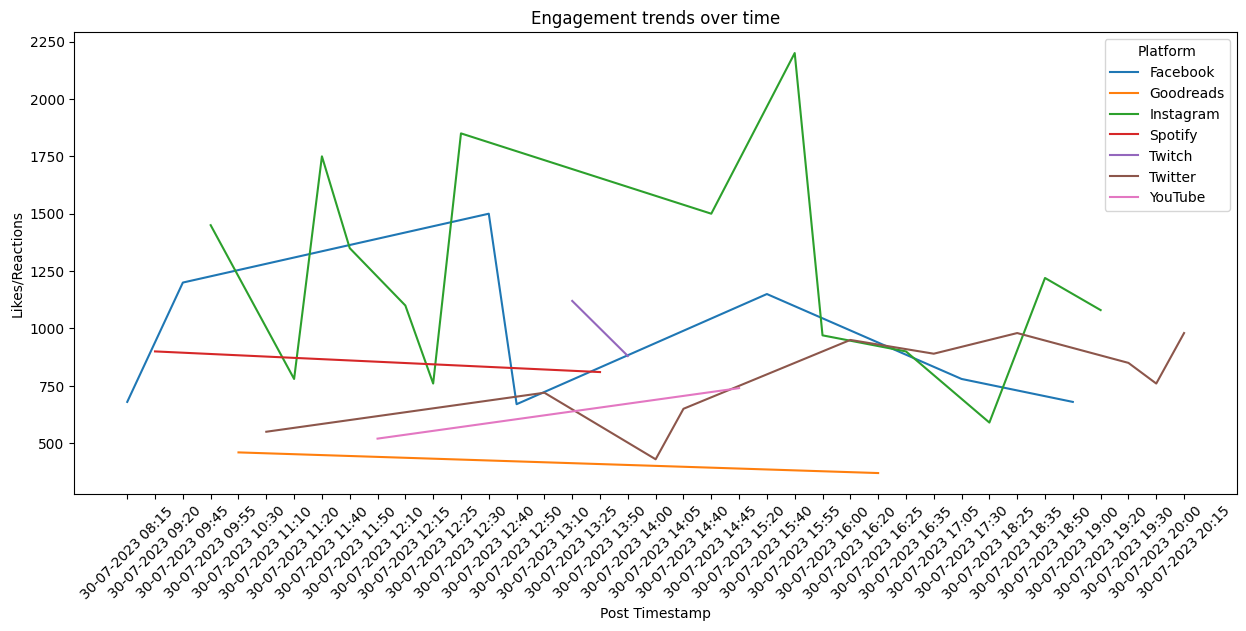

In [145]:
# Sort DataFrame by 'Post Timestamp'
df = df.sort_values('Post Timestamp')

# Plot engagement trends over time
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='Post Timestamp', y='Likes/Reactions', hue='Platform')
plt.title("Engagement trends over time")
plt.xlabel("Post Timestamp")
plt.ylabel("Likes/Reactions")
plt.xticks(rotation=45)
plt.show()

c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


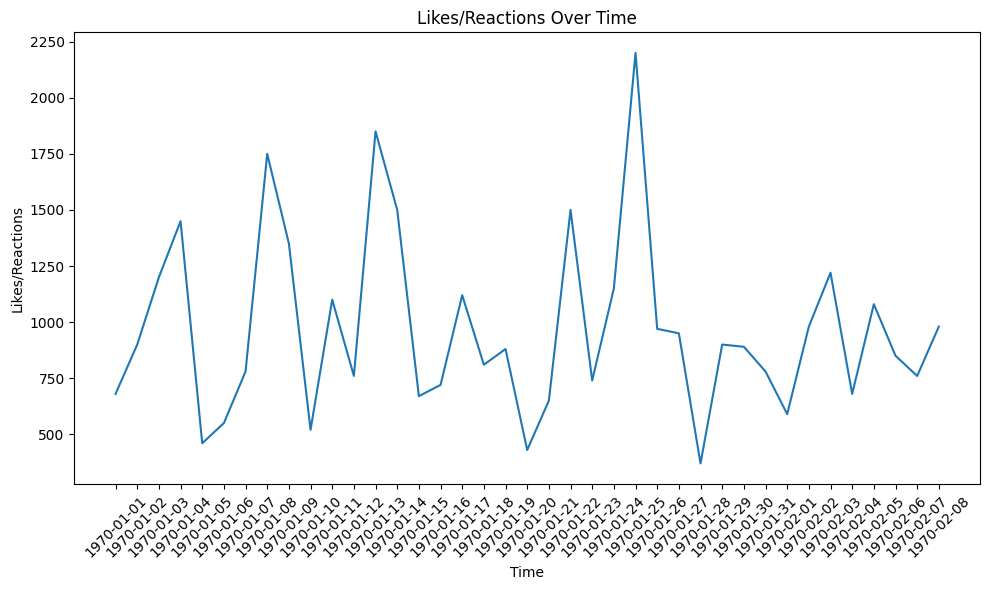

In [146]:
# Plot 'Likes/Reactions' over time

import seaborn as sns
import matplotlib.dates as mdates

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot 'Likes/Reactions' over time with seaborn
sns.lineplot(x='Post Timestamp', y='Likes/Reactions', data=df, ax=ax)

# Set title and labels
ax.set_title('Likes/Reactions Over Time')
ax.set_xlabel('Time')
ax.set_ylabel('Likes/Reactions')

# Rotate x-axis labels for better visibility
ax.tick_params(axis='x', rotation=45)

# Format x-axis labels as dates
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)

# Show the plot
plt.tight_layout()
plt.show()

c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\mar27\AppData\Local\Programs\Pyth

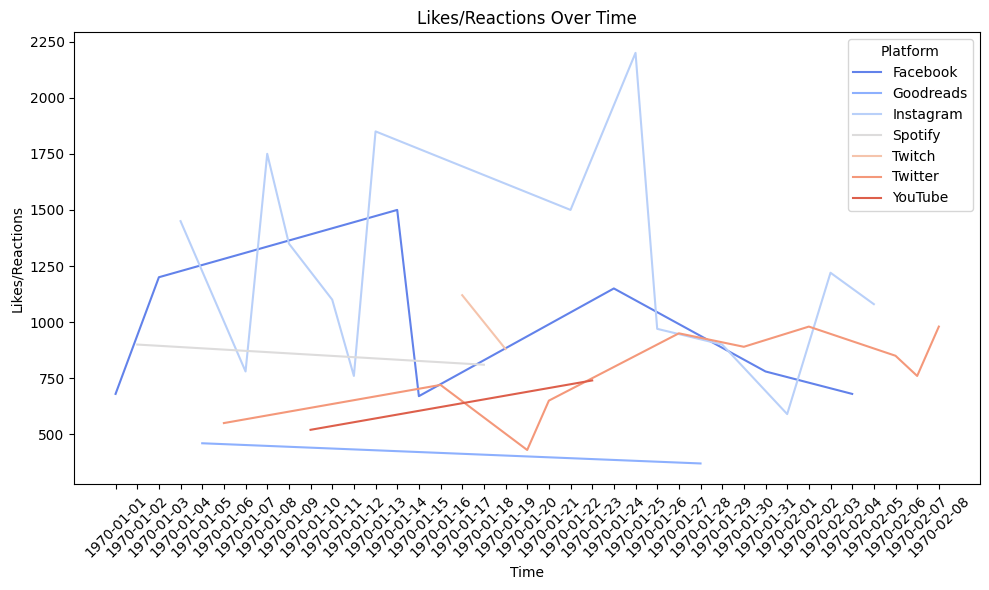

In [147]:
import seaborn as sns
import matplotlib.dates as mdates

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot 'Likes/Reactions' over time with seaborn, different line for each platform
sns.lineplot(x='Post Timestamp', y='Likes/Reactions', hue='Platform', data=df, ax=ax, palette='coolwarm')

# Set title and labels
ax.set_title('Likes/Reactions Over Time')
ax.set_xlabel('Time')
ax.set_ylabel('Likes/Reactions')

# Rotate x-axis labels for better visibility
ax.tick_params(axis='x', rotation=45)

# Format x-axis labels as dates
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\mar27\AppData\Local\Temp\ipykernel_21532\1241337367.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_likes = df.groupby('Platform')['Likes/Reactions'].mean().reset_index()
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


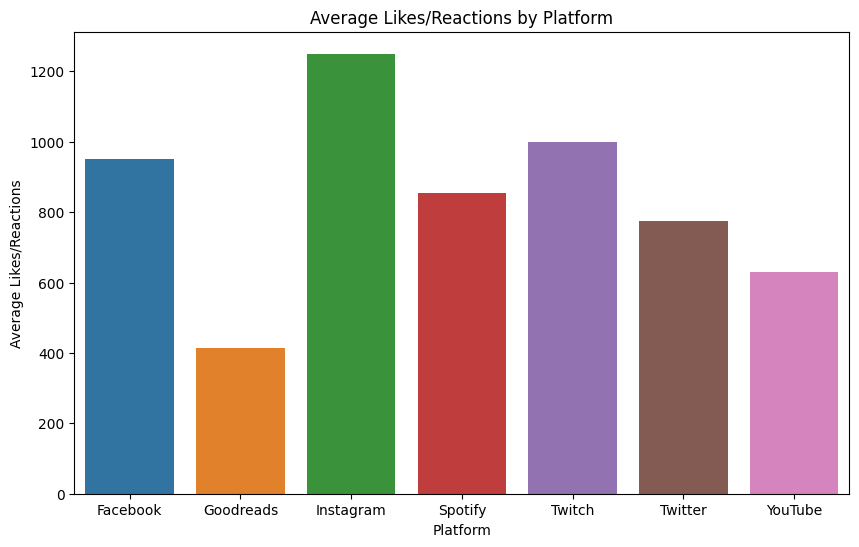

In [148]:
### Comparative analysis

import seaborn as sns

# Calculate average likes/reactions by platform
avg_likes = df.groupby('Platform')['Likes/Reactions'].mean().reset_index()

# Create a bar plot with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Likes/Reactions', data=avg_likes)

# Set title and labels
plt.title('Average Likes/Reactions by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Likes/Reactions')

# Show the plot
plt.show()

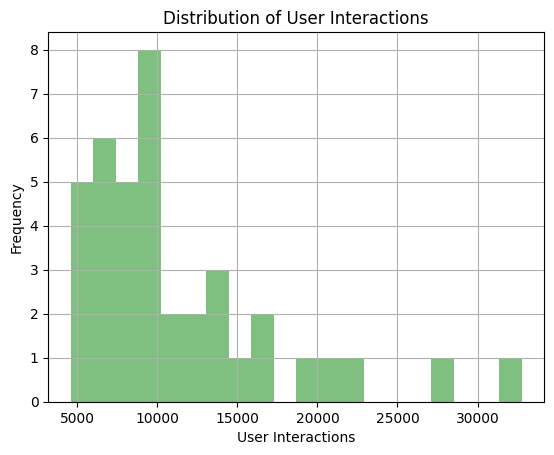

In [149]:
# Analyze user intereaction distribution
# Plotting 
import matplotlib.pyplot as plt

plt.hist(df['User Interactions'], bins=20, alpha=0.5, color='g')
plt.xlabel('User Interactions')
plt.ylabel('Frequency')
plt.title('Distribution of User Interactions')
plt.grid(True)
plt.show()


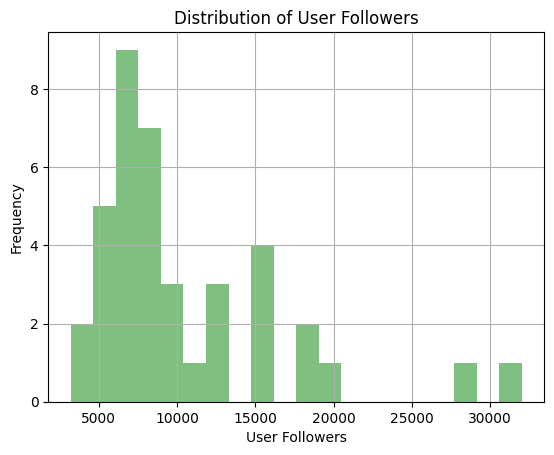

In [150]:
# Analyze user followers distribution
# Plotting

plt.hist(df['User Followers'], bins=20, alpha=0.5, color='g')
plt.xlabel('User Followers')
plt.ylabel('Frequency')
plt.title('Distribution of User Followers')
plt.grid(True)
plt.show()


c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


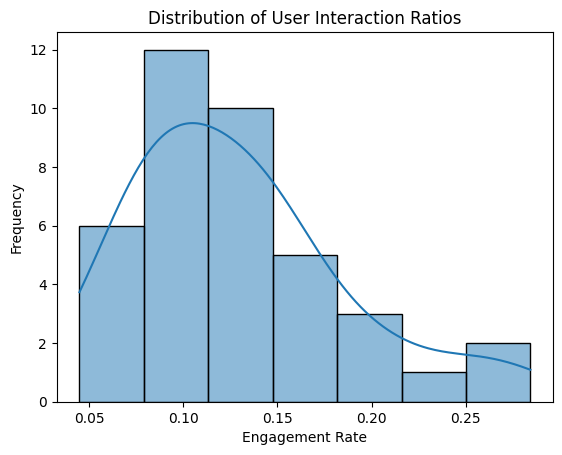

In [151]:
# Analyze user interaction ratio distribution
# Plotting

# Plot distribution of Engagement Rate
sns.histplot(df['Engagement Rate'], kde=True)
plt.title('Distribution of User Interaction Ratios')
plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')
plt.show()

c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<AxesSubplot: xlabel='Platform', ylabel='Likes/Reactions'>

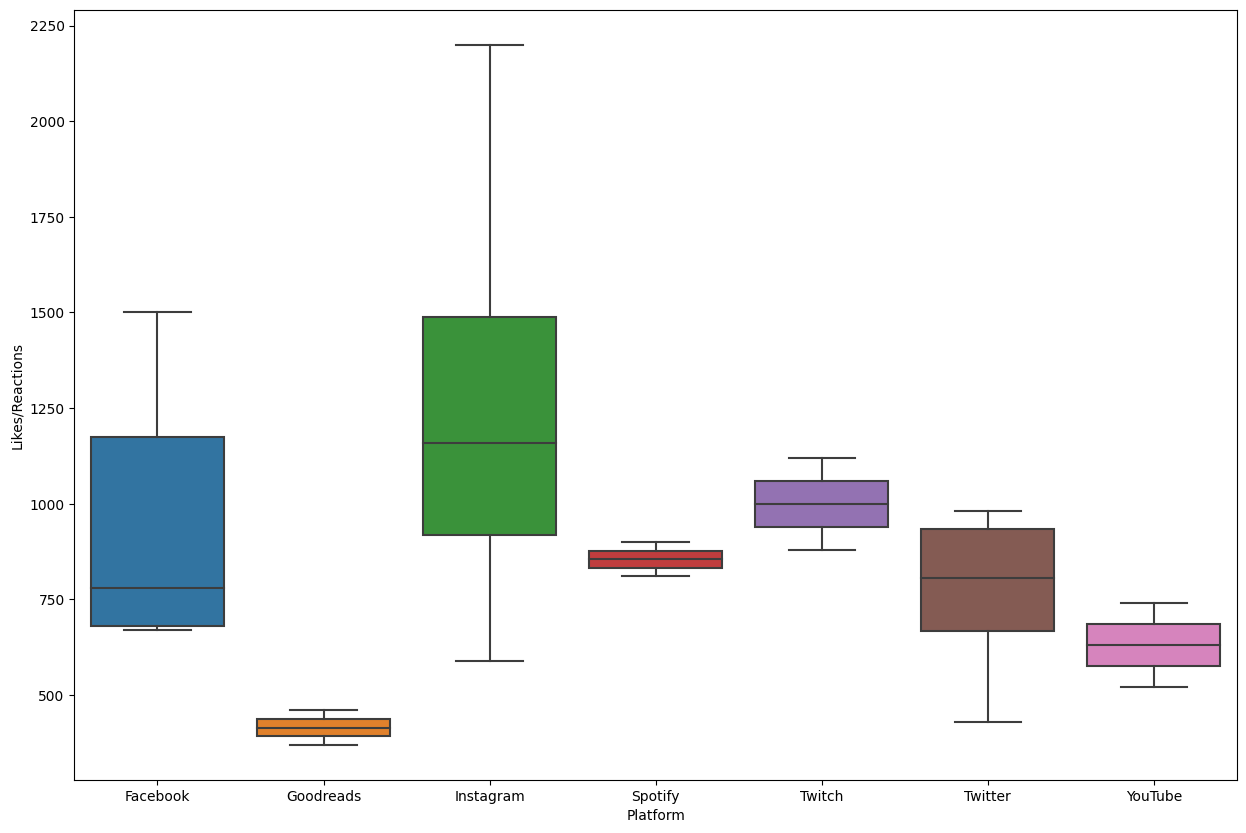

In [152]:
# Using boxplot to visualize the data
plt.figure(figsize=(15, 10))
sns.boxplot(x='Platform', y='Likes/Reactions', data=df)

c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<AxesSubplot: xlabel='Platform', ylabel='Comments'>

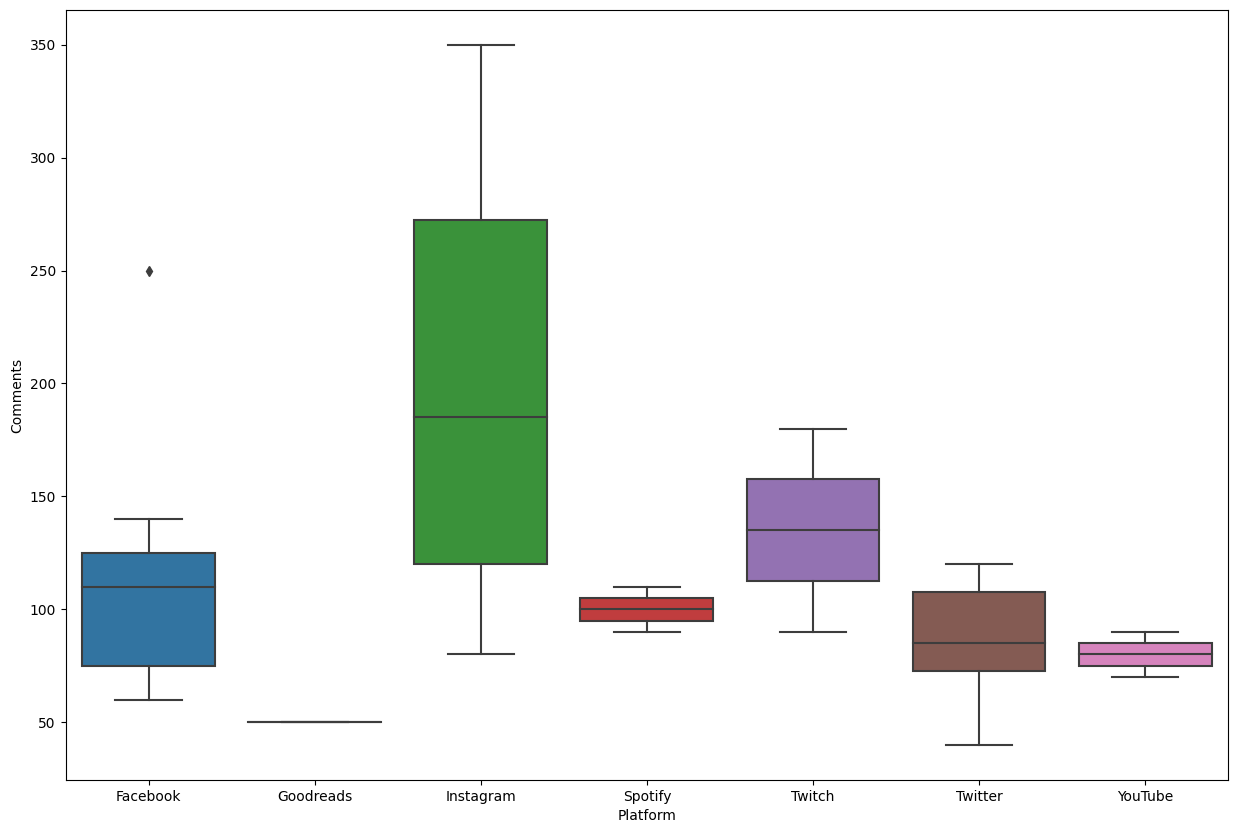

In [153]:
# boxplot using comments
plt.figure(figsize=(15, 10))
sns.boxplot(x='Platform', y='Comments', data=df)

In [154]:
# to see the outlier from facebook in comments
df[df['Platform'] == 'Facebook'].nlargest(5, 'Comments')


User ID          Username  Platform  Post ID  \
20      954      @fitnessGuru  Facebook    92634   
28      210     @globeTrotter  Facebook    67482   
5       609   @wanderlustSoul  Facebook    24680   
38      955         @techGeek  Facebook    20983   
2       946  @wellnessJourney  Facebook    45982   

                                            Post Text    Post Timestamp  \
20                 "Empowering lives through fitness!  30-07-2023 12:40   
28  "Discovering the world's wonders! ?? #Wanderlust"  30-07-2023 15:40   
5                    "Embracing the beauty of nature!  30-07-2023 09:45   
38             "Unraveling the marvels of technology!  30-07-2023 12:50   
2               "Finding peace and balance in nature!  30-07-2023 08:15   

    Likes/Reactions  Comments  Shares/Retweets            Hashtags  ...  \
20             1500       250              120  #FitnessMotivation  ...   
28             1150       140               70         #Wanderlust  ...   
5              1200       110               50         #Wanderlust  ...   
38              670       110               50     #TechEnthusiast  ...   
2               680        80               40    #WellnessJourney  ...   

          User Description 2          Server Post User Language Post Length  \
20  Strong mind, strong body     Los Angeles, USA       English          34   
28  Passport stamp collector     Barcelona, Spain       English          49   
5                Free spirit      Bali, Indonesia       English          32   
38                  Futurist  Silicon Valley, USA       English          38   
2       Mindfulness advocate   San Francisco, USA       English          37   

   Post Hour  Account Age  User Bio Length User Interaction Ratio  \
20        12         2432               12               1.038462   
28        15         1808               10               1.112000   
5          9         1688               20               1.142105   
38        12         3021                9               1.091892   
2          8         1509               19               1.033333   

   Post Frequency  Engagement Rate  
20              1         0.119872  
28              1         0.108800  
5               1         0.143158  
38              1         0.044865  
2               1         0.133333  

[5 rows x 34 columns]

c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_

<AxesSubplot: xlabel='Likes/Reactions', ylabel='Count'>

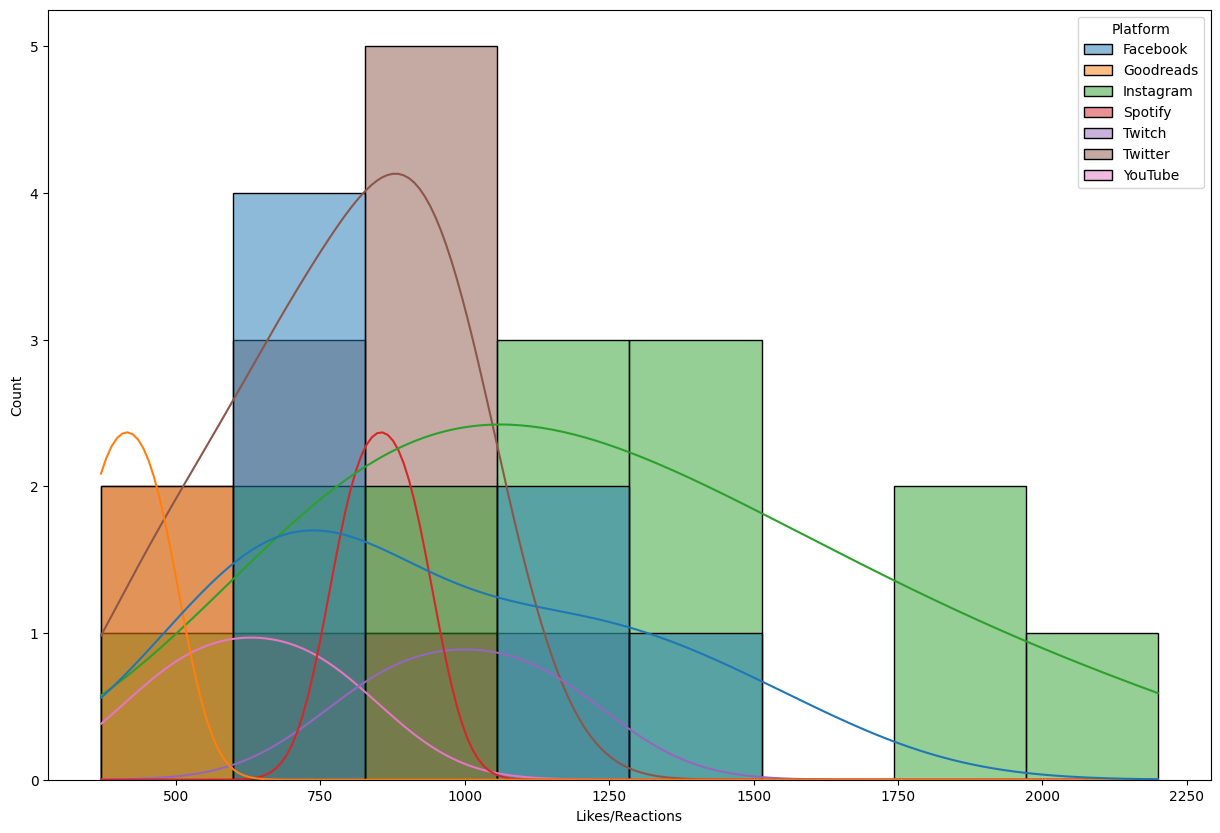

In [155]:
# using histograms to plot the data about different platforms
plt.figure(figsize=(15, 10))
sns.histplot(data=df, x='Likes/Reactions', hue='Platform', kde=True)

c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<AxesSubplot: xlabel='Platform', ylabel='Likes/Reactions'>

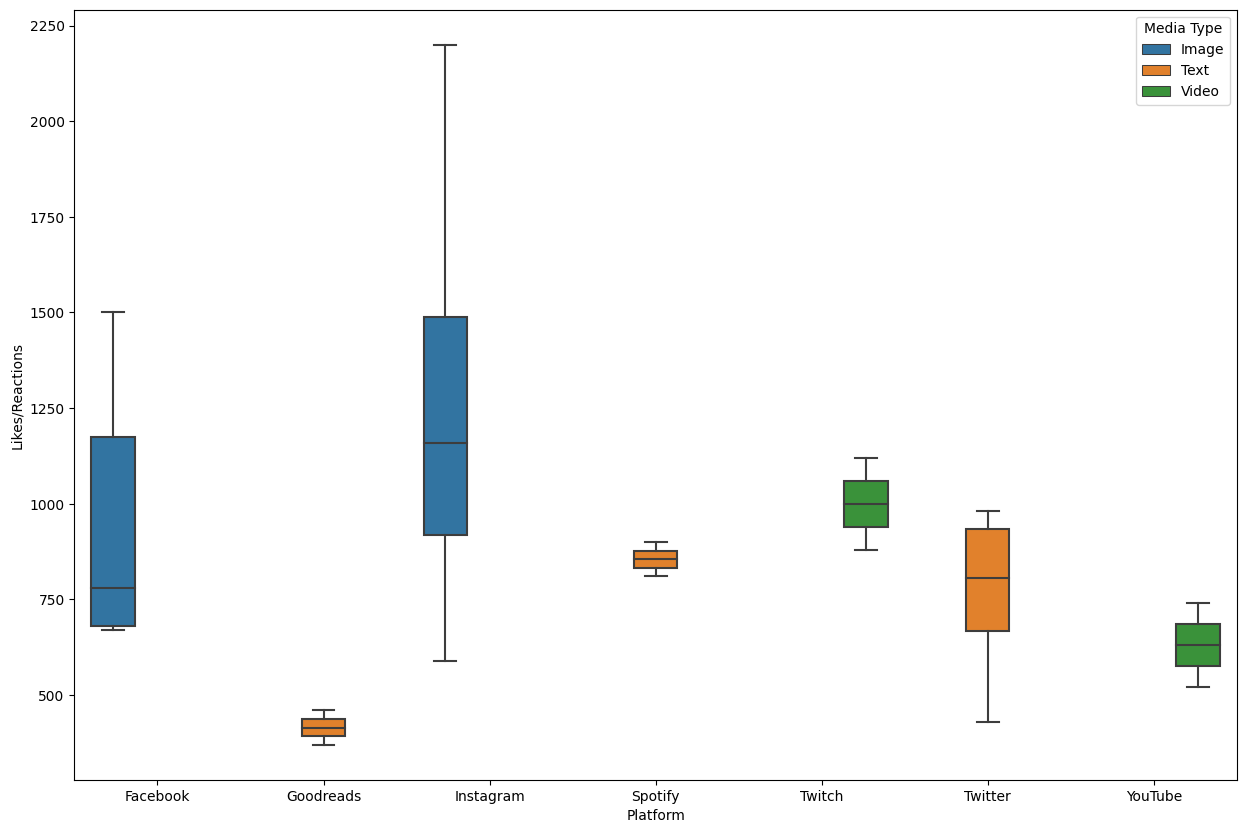

In [156]:
# boxplot for instagram and youtube and distinguish from likes
plt.figure(figsize=(15, 10))
sns.boxplot(x='Platform', y='Likes/Reactions', data=df, hue='Media Type')

c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<AxesSubplot: xlabel='Platform', ylabel='Comments'>

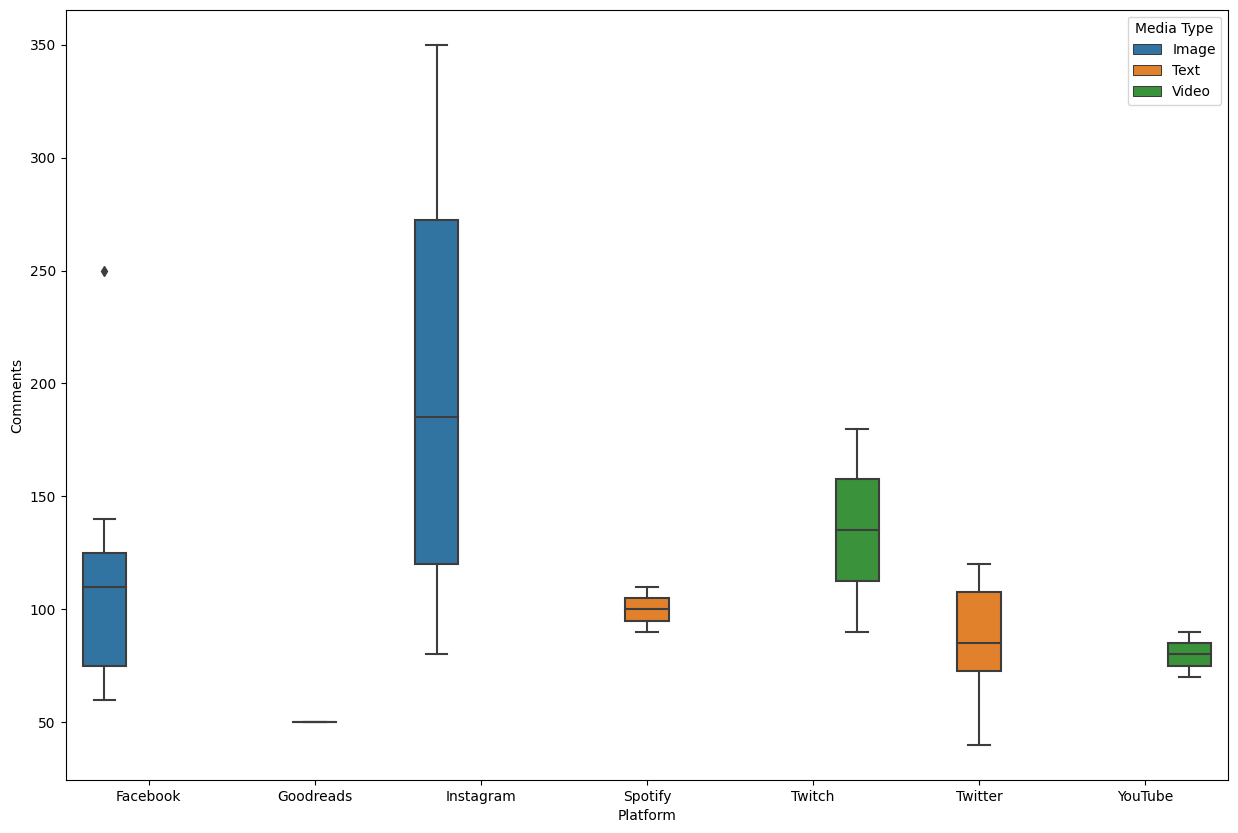

In [157]:
# boxplot for instagram and youtube and distinguish from comments
plt.figure(figsize=(15, 10))
sns.boxplot(x='Platform', y='Comments', data=df, hue='Media Type')

c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<AxesSubplot: xlabel='Platform', ylabel='User Interaction Ratio'>

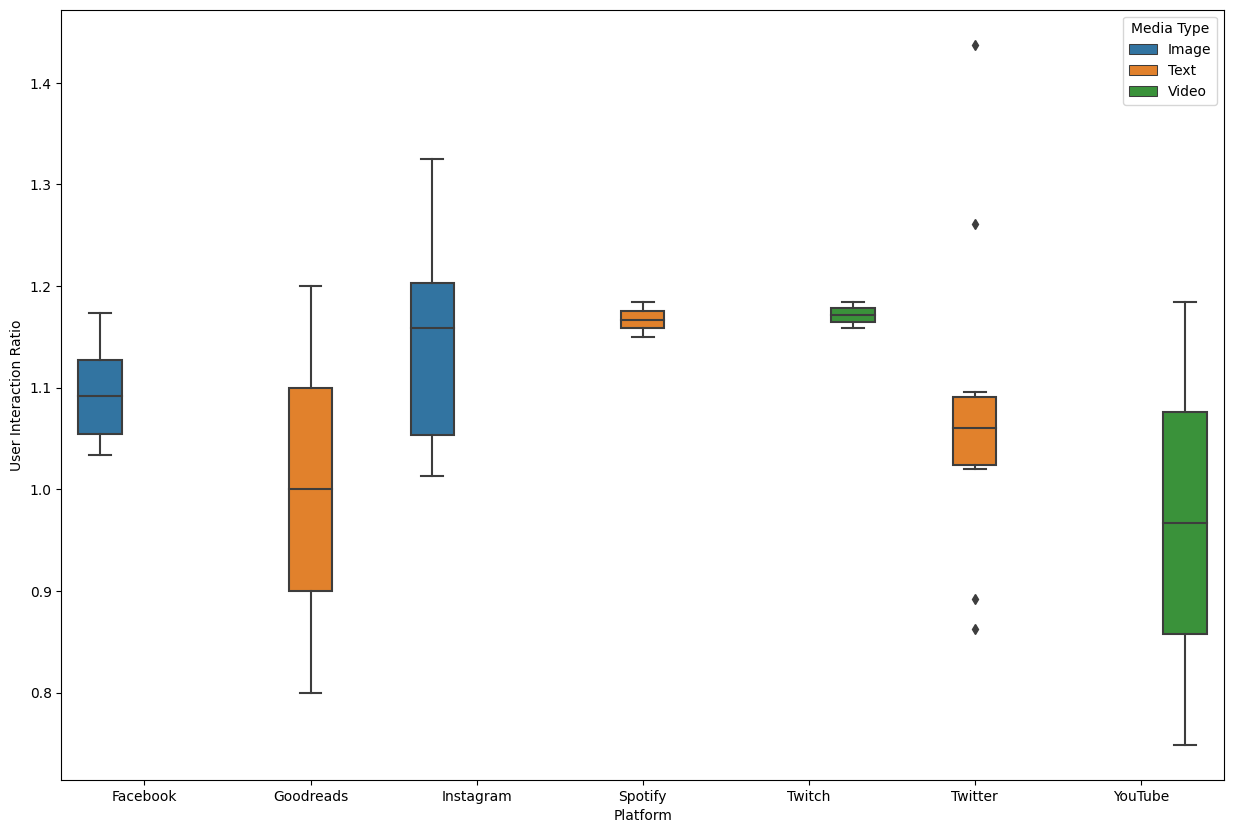

In [158]:
# boxplot for instagram and youtube and distinguish from User Interaction Ratio
plt.figure(figsize=(15, 10))
sns.boxplot(x='Platform', y='User Interaction Ratio', data=df, hue='Media Type')

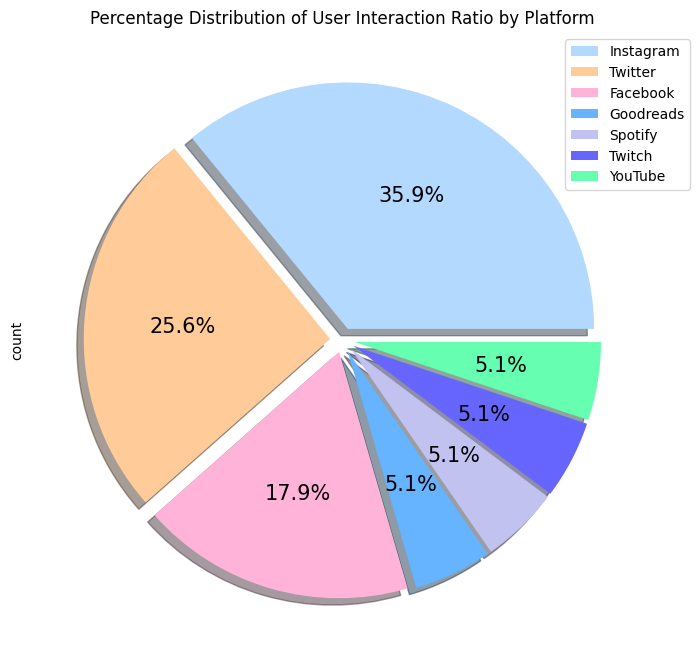

In [159]:
# Define a color palette
colors = ['#B3D9FF', '#ffcc99', '#FFB3D9', '#66b3ff', '#c2c2f0','#6666ff', '#66FFB2']

# Get the value counts of the 'Platform' column
platform_counts = df['Platform'].value_counts()

# Calculate the number of platforms to determine the size of the explode list
num_platforms = len(platform_counts)

# Plot the pie chart
platform_counts.plot.pie(explode=[0.05]*num_platforms, shadow=True, autopct='%1.1f%%', figsize=(12,8), colors=colors, fontsize=15, labels=None)

# Get the platform labels
labels = platform_counts.index.tolist()

# Set the title and legend
plt.title('Percentage Distribution of User Interaction Ratio by Platform')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)


C:\Users\mar27\AppData\Local\Temp\ipykernel_21532\994077617.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Media Type')


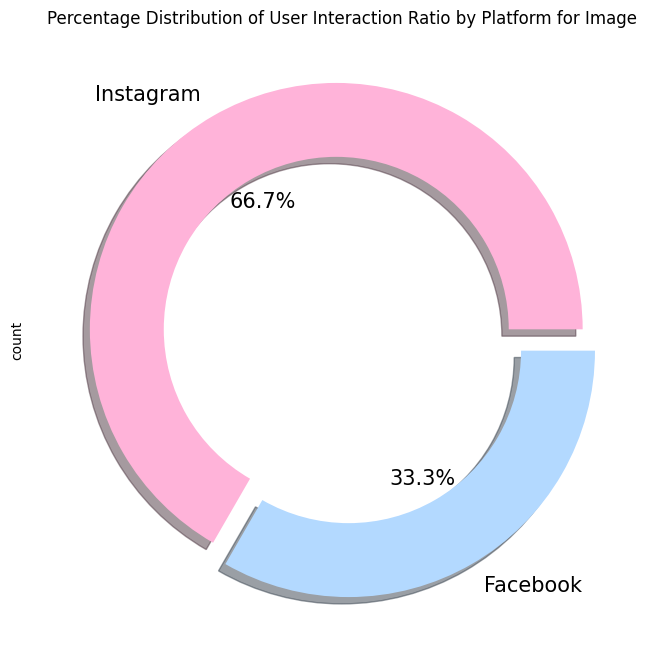

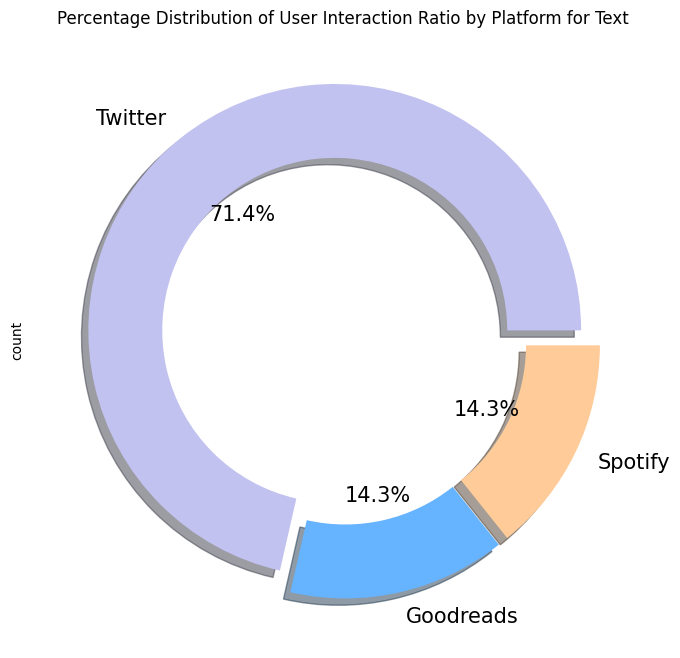

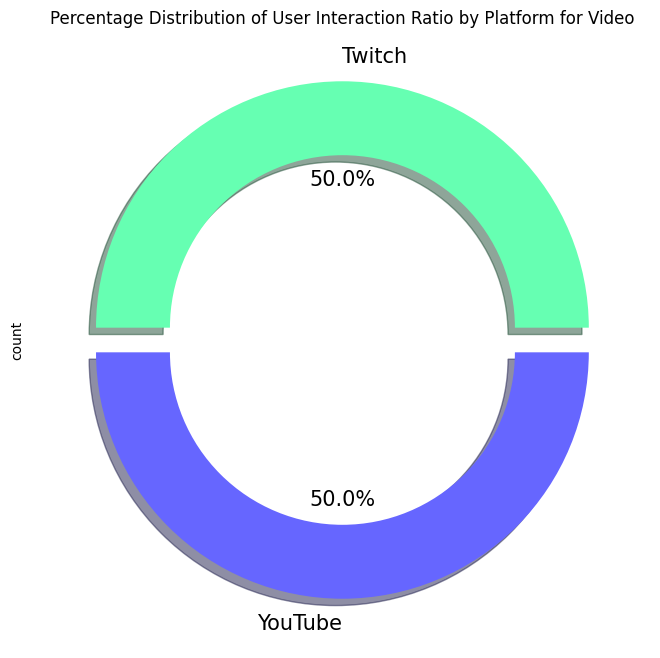

In [160]:
# Define a color palette
colors = ['#B3D9FF', '#ffcc99', '#FFB3D9', '#66b3ff', '#c2c2f0','#6666ff', '#66FFB2']

# Create a dictionary that maps each platform to a color
platforms = df['Platform'].unique()
color_dict = dict(zip(platforms, colors))

# Group the data by media type
grouped = df.groupby('Media Type')

# Create a separate donut plot for each media type
for name, group in grouped:
    # Get the value counts of the 'Platform' column for this group
    platform_counts = group['Platform'].value_counts()

    # Filter out the platforms with a count of 0
    platform_counts = platform_counts[platform_counts > 0]

    # Calculate the number of platforms to determine the size of the explode list
    num_platforms = len(platform_counts)

    # Get the colors for the platforms in this group
    group_colors = [color_dict[platform] for platform in platform_counts.index]

    # Plot the donut chart
    platform_counts.plot.pie(explode=[0.05]*num_platforms, shadow=True, autopct='%1.1f%%', figsize=(12,8), fontsize=15, labels=platform_counts.index, colors=group_colors, wedgeprops=dict(width=0.3))

    # Set the title
    plt.title(f'Percentage Distribution of User Interaction Ratio by Platform for {name}')

    # Remove the 'count' label from the y-axis
    plt.yticks([])

    # Show the plot
    plt.show()

In [161]:
# making a contingency table 
contingency_table = pd.crosstab(df['Platform'], df['Media Type'], normalize='columns')
contingency_table

Media Type     Image      Text  Video
Platform                             
Facebook    0.333333  0.000000    0.0
Goodreads   0.000000  0.142857    0.0
Instagram   0.666667  0.000000    0.0
Spotify     0.000000  0.142857    0.0
Twitch      0.000000  0.000000    0.5
Twitter     0.000000  0.714286    0.0
YouTube     0.000000  0.000000    0.5

## 5 - Correlations

<AxesSubplot: >

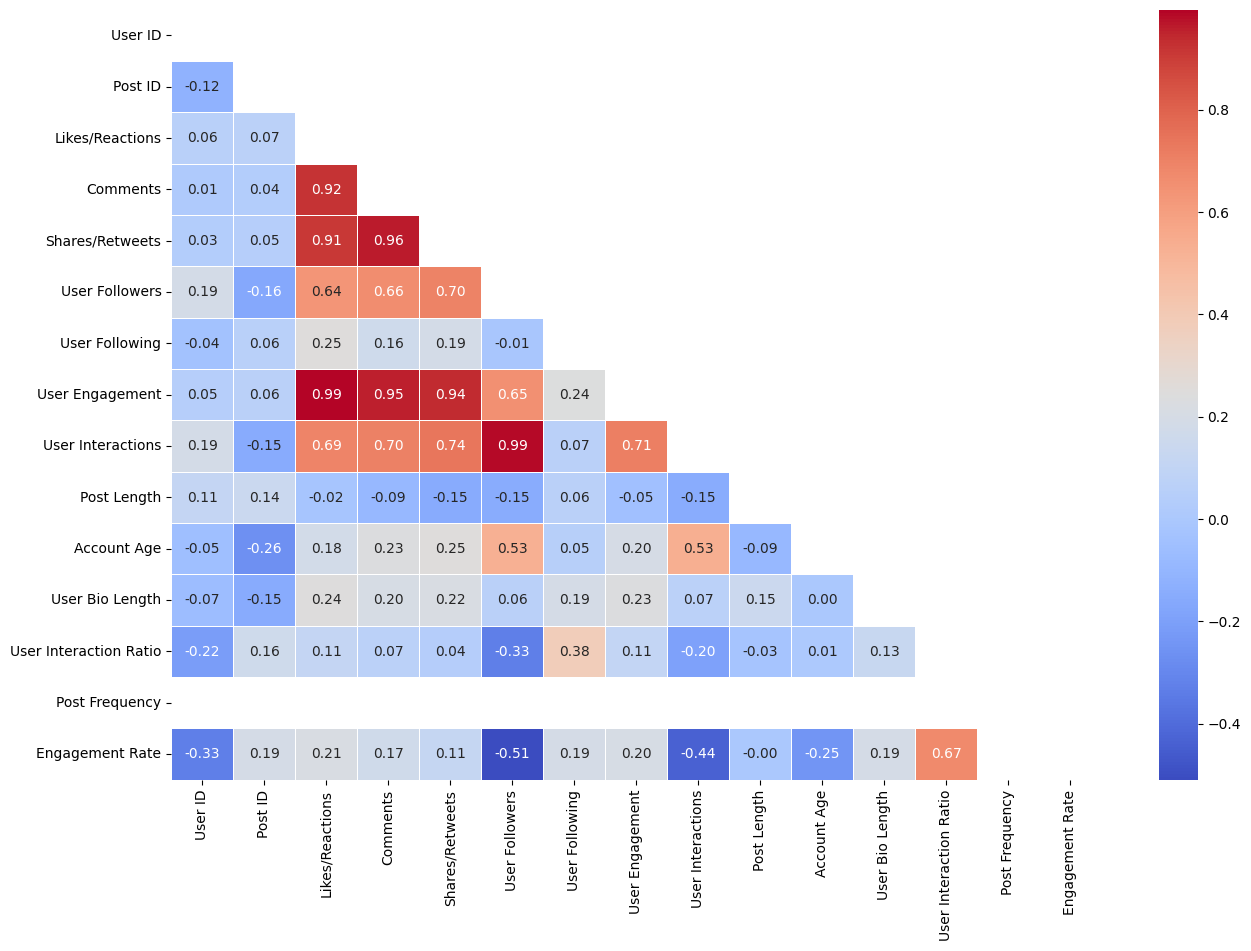

In [162]:
# Exclude non-numeric columns from correlation calculation
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)

We can see how Likes/Reactions, Comments and Shares/Retweets are highly positive correlated. These variables are used to measure the interaction with the user account.

c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_

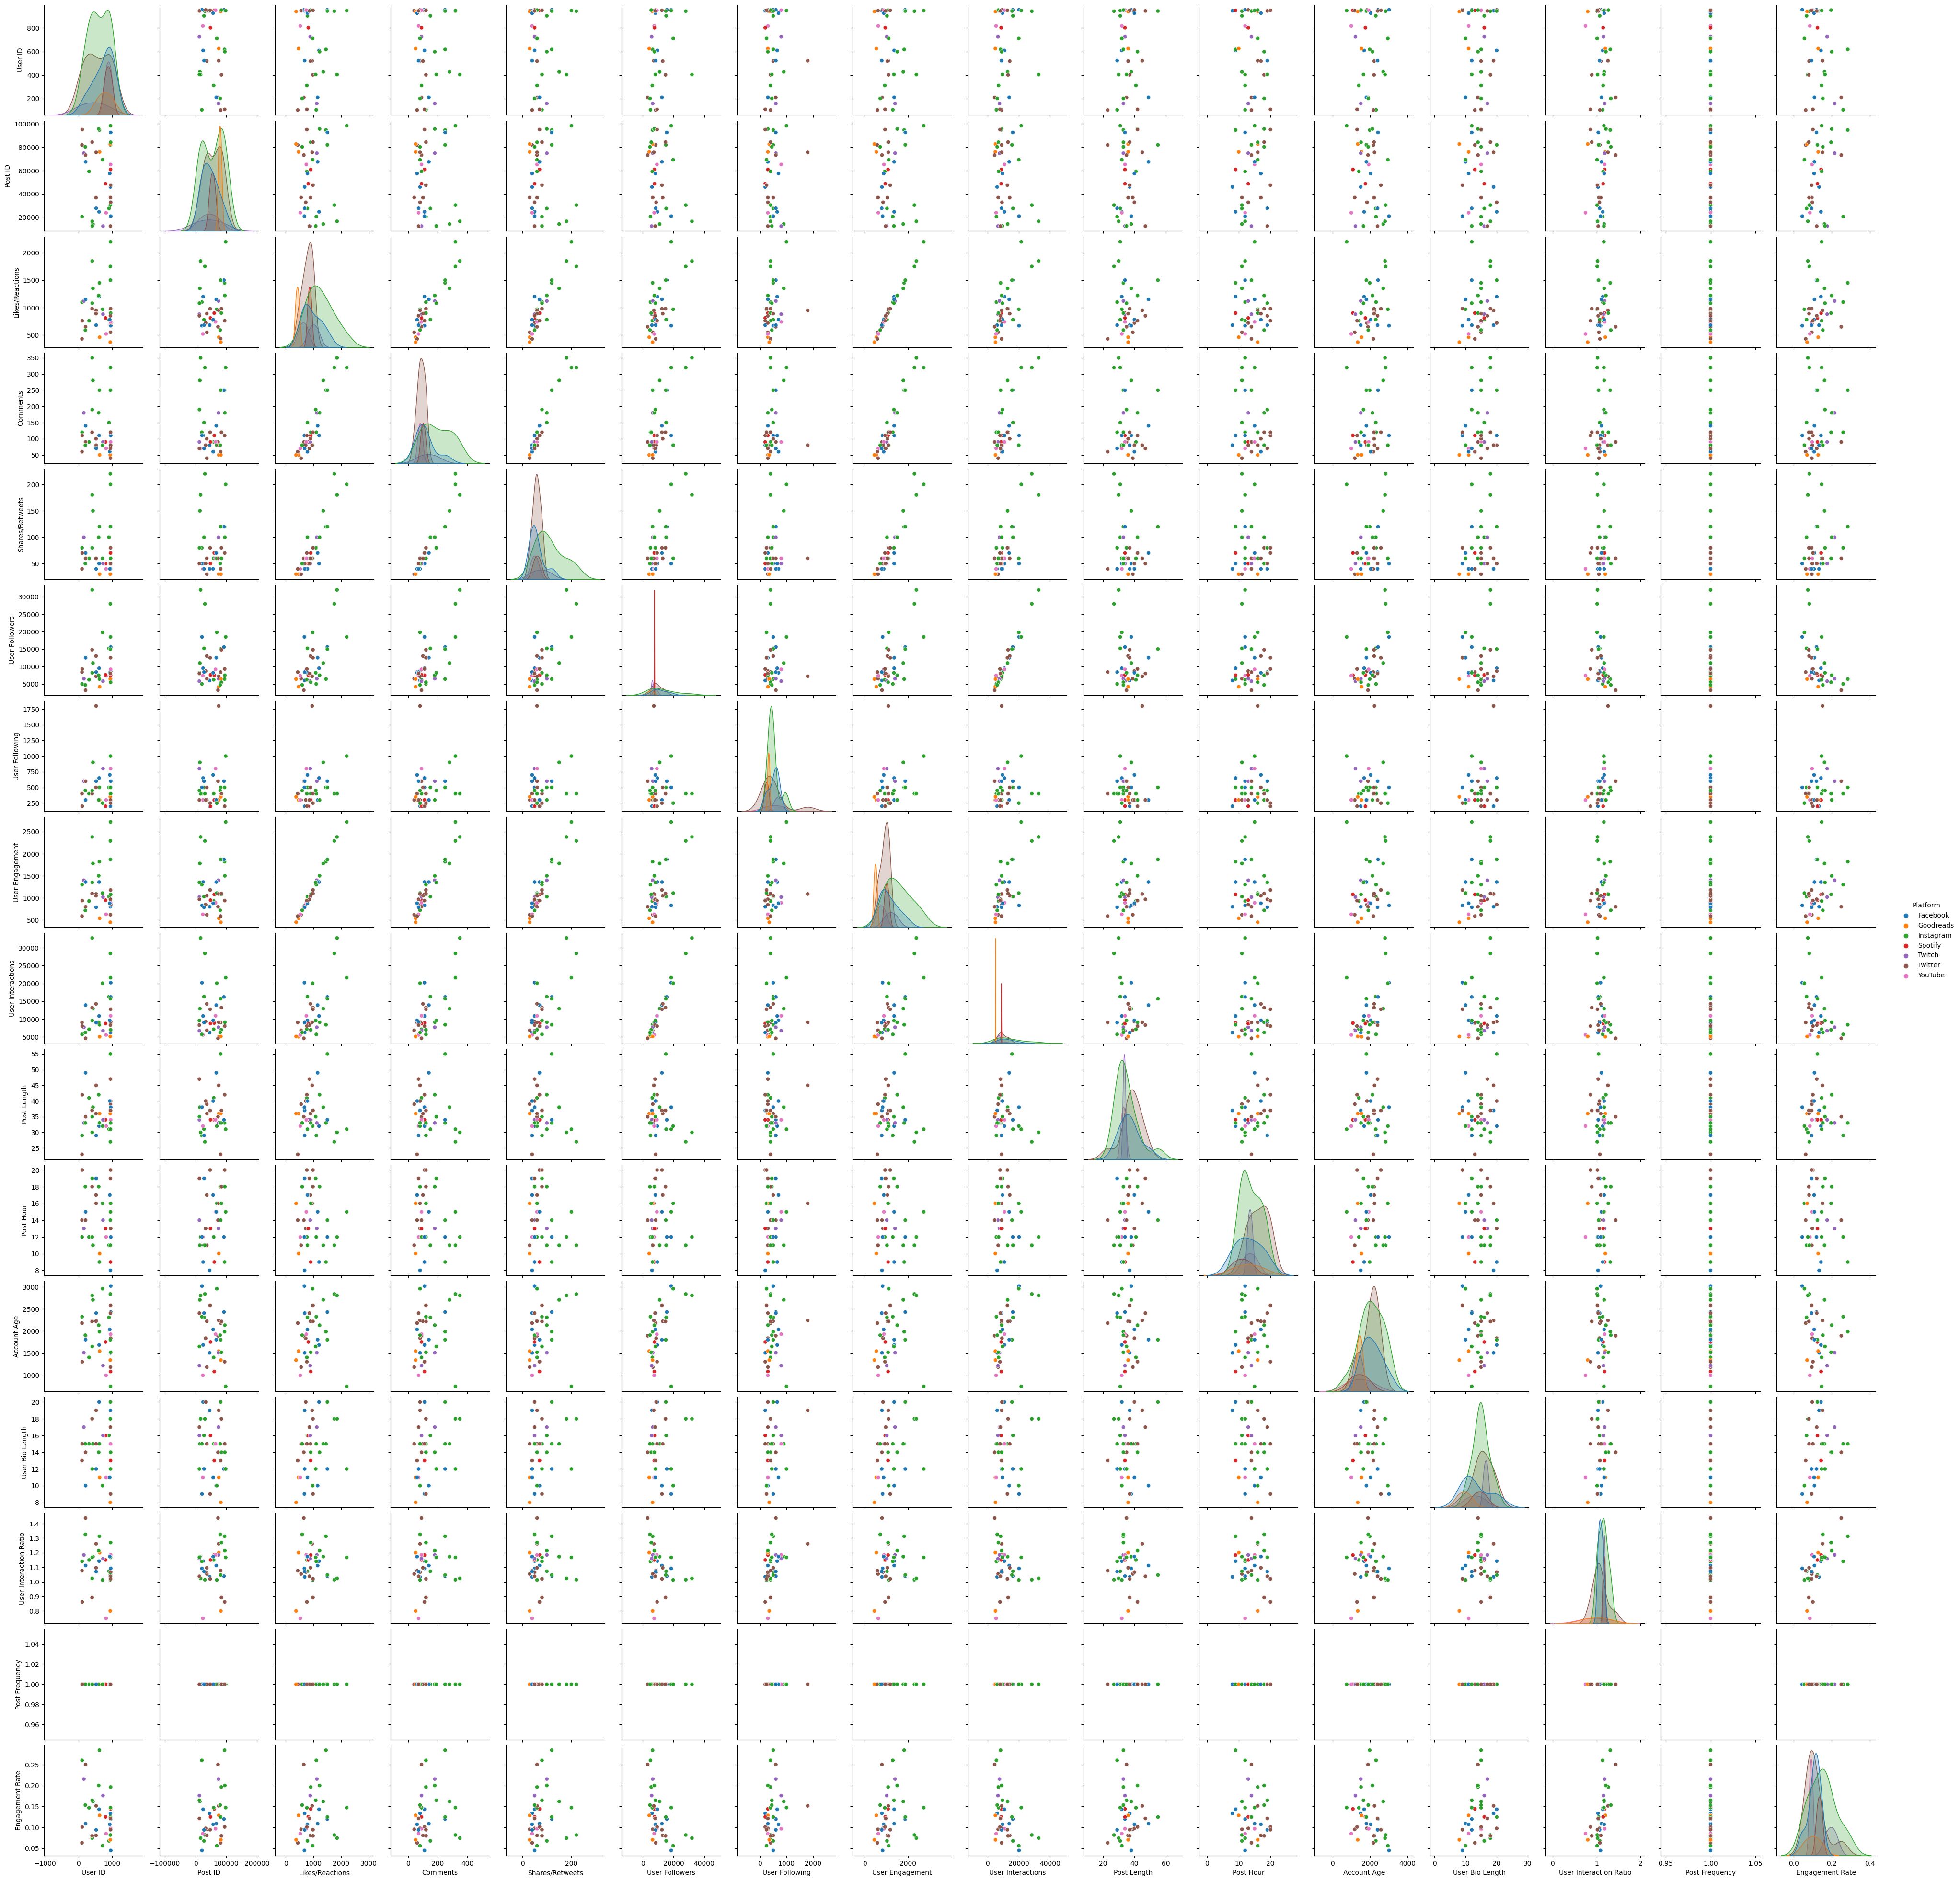

In [163]:
# plotting a sns pairplot
sns.pairplot(df, hue='Platform', diag_kind='kde')


c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

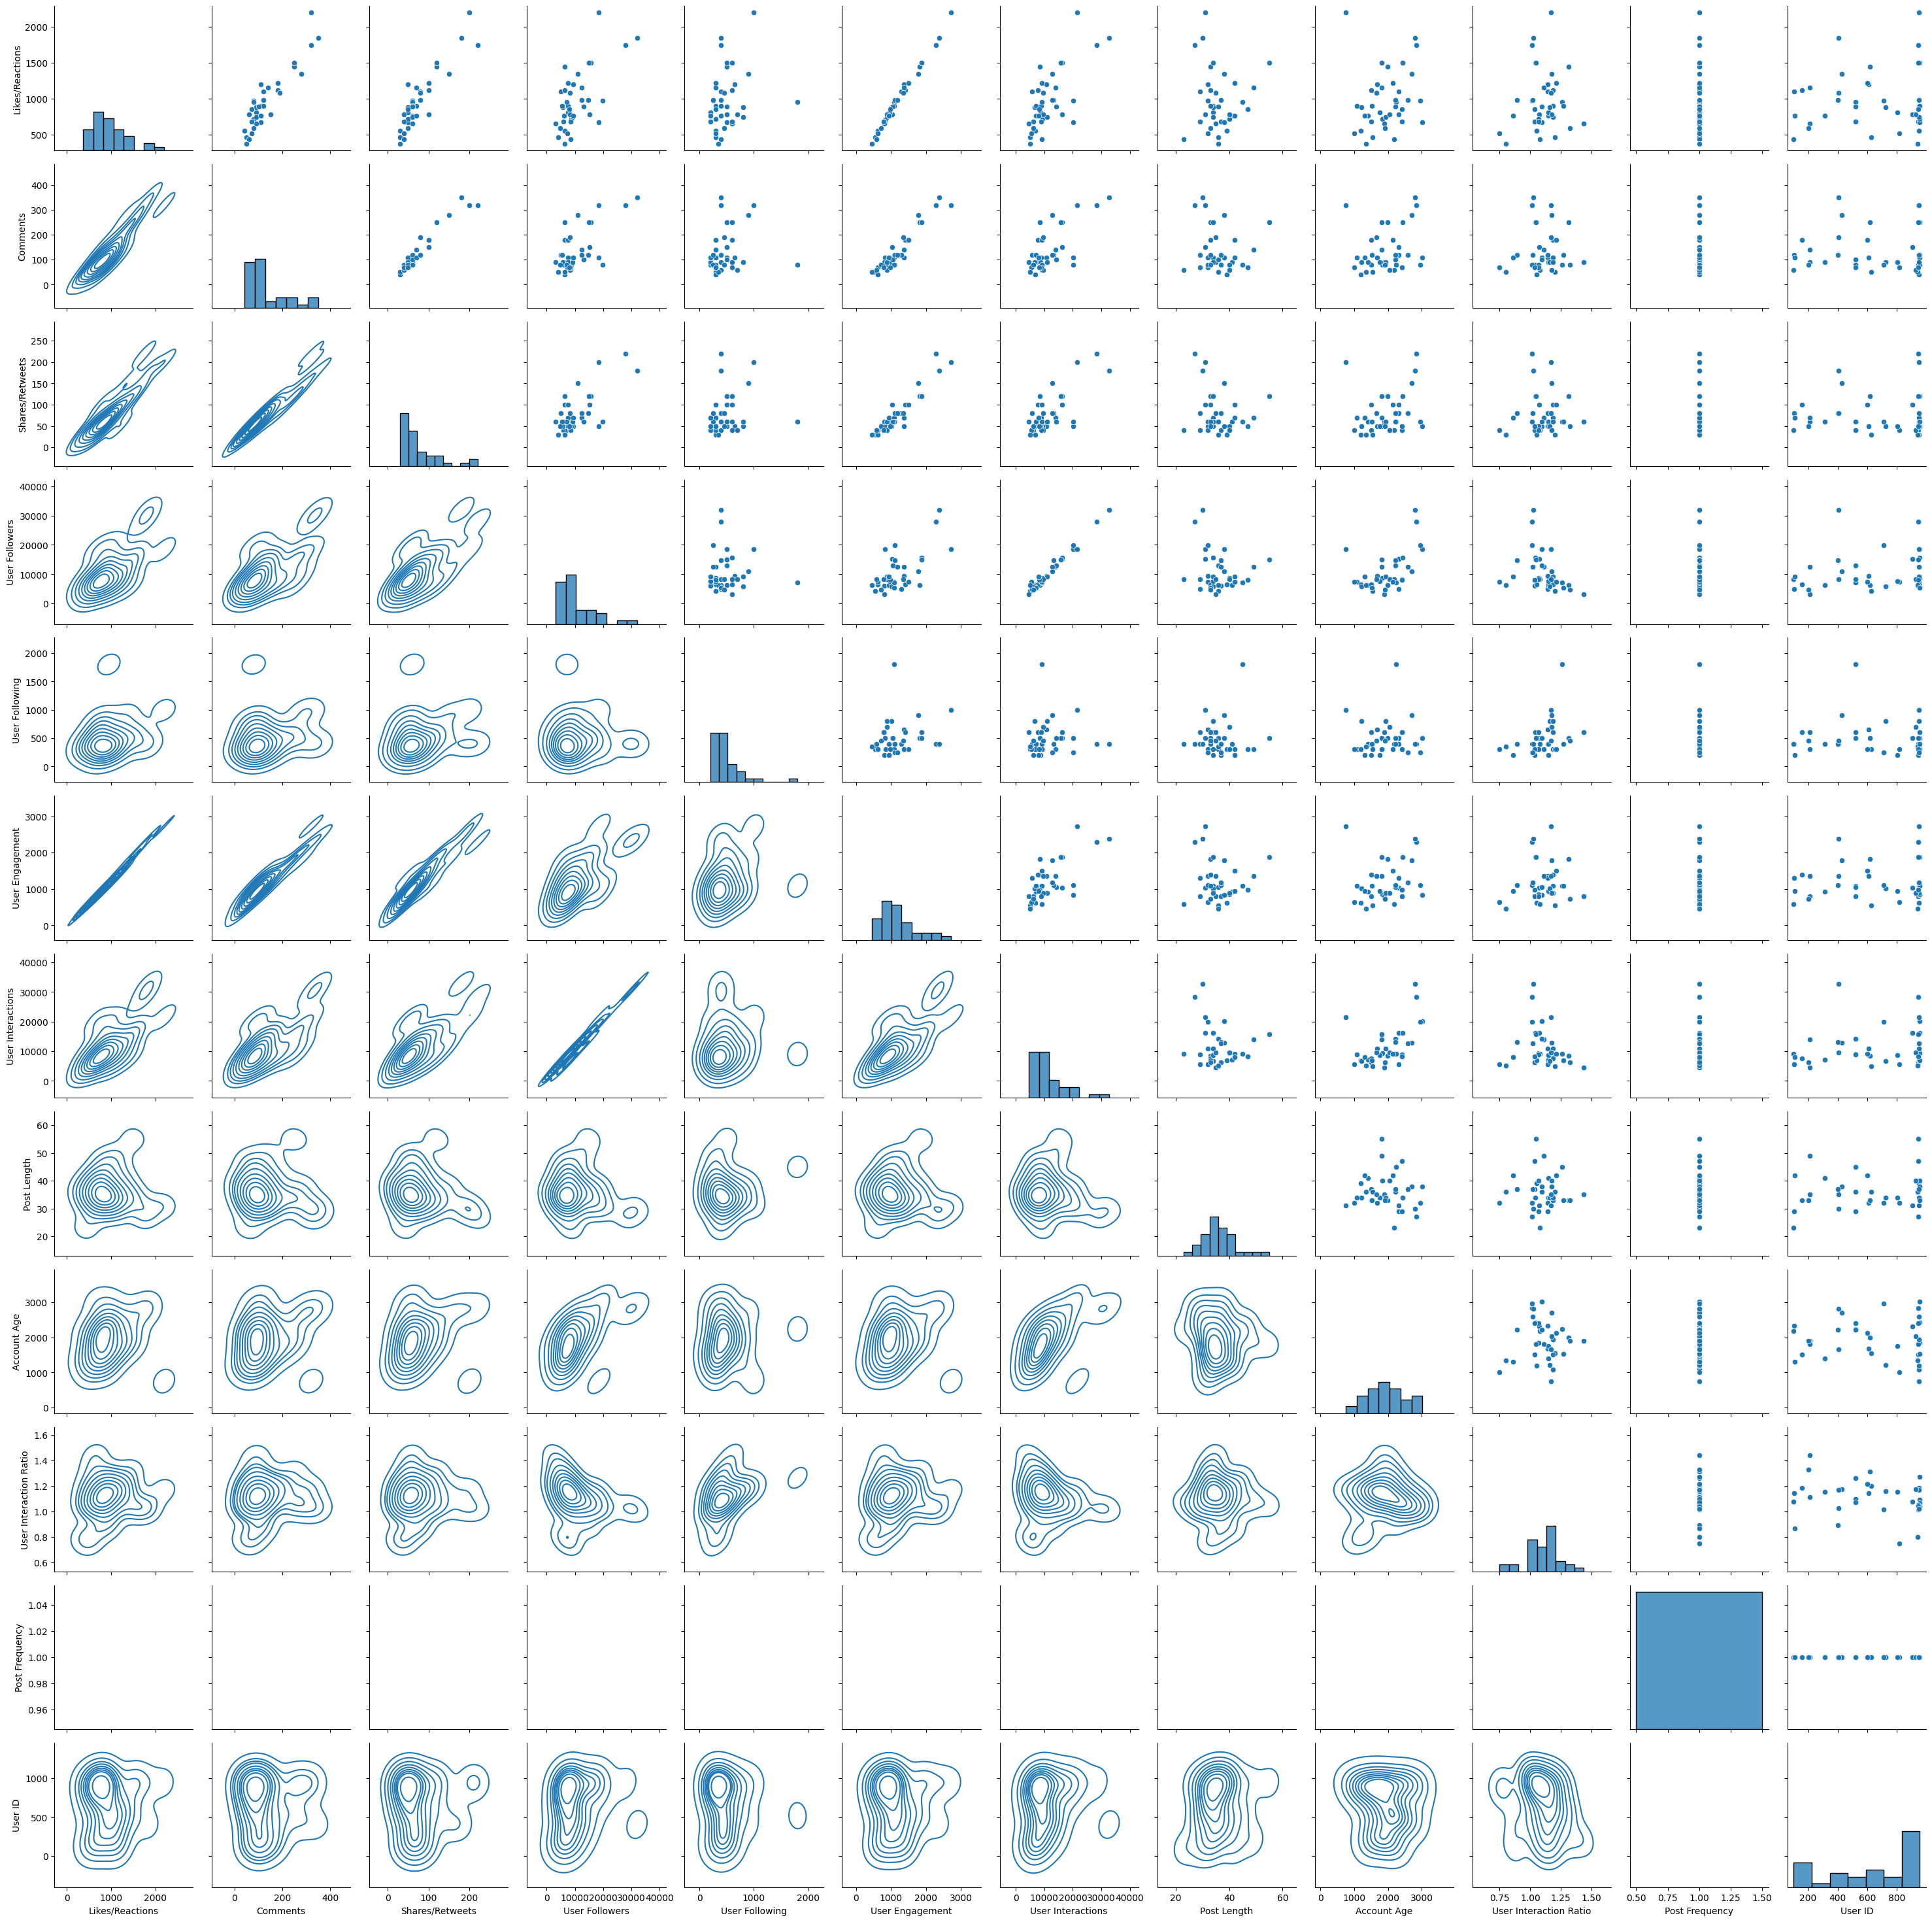

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the variables
variables = ['Likes/Reactions', 'Comments', 'Shares/Retweets', 'User Followers', 'User Following', 'User Engagement', 'User Interactions', 'Post Length', 'Account Age', 'User Interaction Ratio', 'Post Frequency', 'User ID']
df_selected = df[variables]

# Create a custom pairplot
g = sns.PairGrid(df_selected)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot)

plt.show()

## 6 - Conclusions

Based on the data analyzed, we can observe notable differences in **platform usage** depending on whether they are focused on _video, images, or text_ content. Platforms centered around images, such as Instagram and Facebook, exhibit significantly higher levels of interaction and engagement compared to those primarily featuring video content (Twitch and YouTube) or textual content (Goodreads and Twitter), with the latter two ranking second and third, respectively.

However, it is important to consider that **the duration of follower engagement** with a post (particularly images) is considerably shorter than that of video content. For a follower to invest time in watching a video, there must be a certain level of connection with the user or compelling content that captures their attention. Therefore, this aspect should be taken into account when devising marketing strategies involving influencers or brands on social media platforms. The number of interactions alone may not accurately reflect the audience attracted, and the value of likes on Instagram may differ significantly from those on YouTube or Twitch.

Understanding these nuances in platform usage and engagement behavior is crucial for optimizing marketing strategies and maximizing the impact of social media campaigns. By tailoring content and engagement tactics to the unique characteristics of each platform, businesses can effectively reach and engage with their target audience, ultimately driving meaningful interactions and achieving their marketing objectives.